## CLASIFICACION DE MASAS ESTELARES
Se busca predecir si estamos en presencia de una galaxia, una estrella o un Quasar

1. Importaciones y Configuración: En esta sección importamos todas las librerías necesarias para:
- PyTorch: Framework de deep learning
- Scikit-learn: Preprocesamiento y métricas
- NumPy/Matplotlib: Manipulación de datos y visualización
- kagglehub: Importacion del dataset

In [ ]:
# === IMPORTACIONES Y CONFIGURACIÓN INICIAL ===

# Librerías estándar de Python
import os          # Manejo de sistema de archivos
import math        # Operaciones matemáticas
import time        # Medición de tiempo
import numpy as np # Arrays y operaciones numéricas

# PyTorch - Framework de Deep Learning
import torch
import torch.nn as nn                    # Módulos de redes neuronales
import torch.nn.functional as F          # Funciones de activación y pérdida
from torch.utils.data import DataLoader, TensorDataset, Dataset  # Manejo de datos

# Scikit-learn - Preprocesamiento y métricas
from sklearn.preprocessing import StandardScaler           # Normalización de datos
from sklearn.model_selection import train_test_split       # División de datos
from sklearn.impute import SimpleImputer                   # Imputación de valores faltantes
from sklearn.metrics import (mean_absolute_error,          # Métricas de regresión
                             mean_squared_error,
                             r2_score,
                             accuracy_score, 
                             f1_score, 
                             precision_score, 
                             recall_score,
                             confusion_matrix,
                             classification_report)
from sklearn.preprocessing import LabelEncoder

# Imbalanced-learn - Balanceo de clases
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Kagglehub
import zipfile
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de dispositivo
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device: {DEVICE}')
print(f'PyTorch version: {torch.__version__}')

## Análisis exploratorio de datos (EDA) - Continuación

Continuamos con el análisis exploratorio para profundizar en la distribución de las características numéricas y visualizar posibles correlaciones entre ellas.

- Distribución de las características numéricas mediante histogramas.
- Matriz de correlación para identificar relaciones lineales entre características.

Primeras 5 Columnas:


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842



Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: 

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0



Valores unicos


,count
class,
GALAXY,59445
STAR,21594
QSO,18961


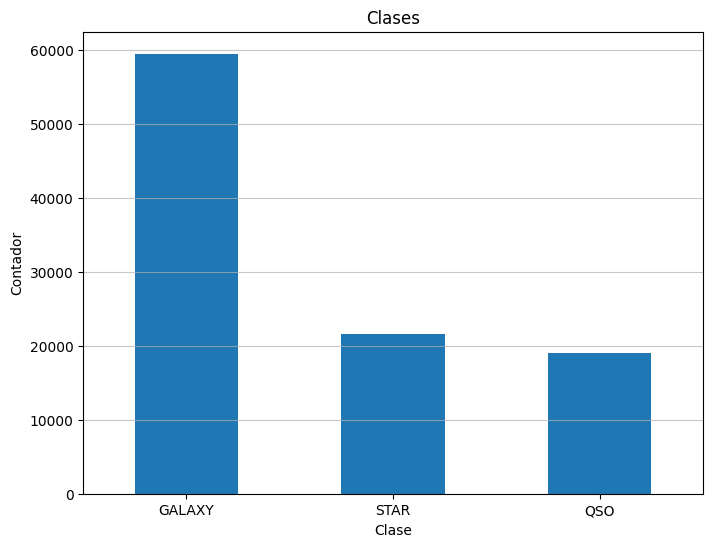

In [ ]:
print("Primeras 5 Columnas:")
display(df.head())

print("\nResumen del dataset:")
df.info()

print("\nValores nulors:")
display(df.isnull().sum())

print("\nValores unicos")
display(df['class'].value_counts())

plt.figure(figsize=(8, 6))
df['class'].value_counts().plot(kind='bar')
plt.title('Clases')
plt.xlabel('Clase')
plt.ylabel('Contador')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7)
plt.show()


Distribución de Características Numéricas:


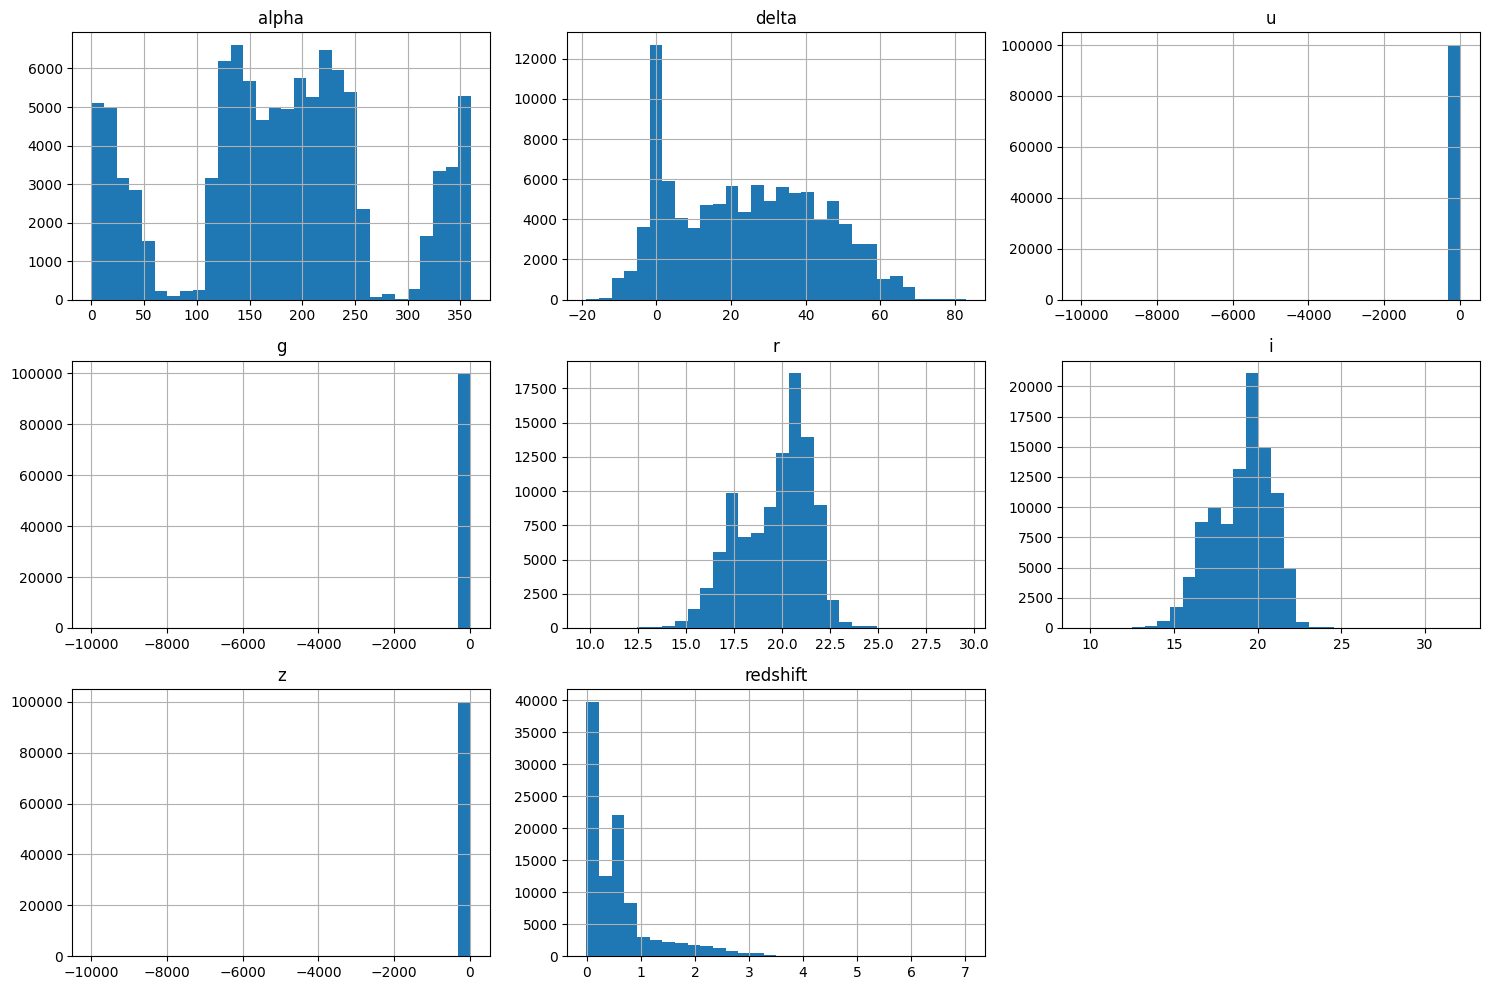


Matriz de Correlación de Características Numéricas:


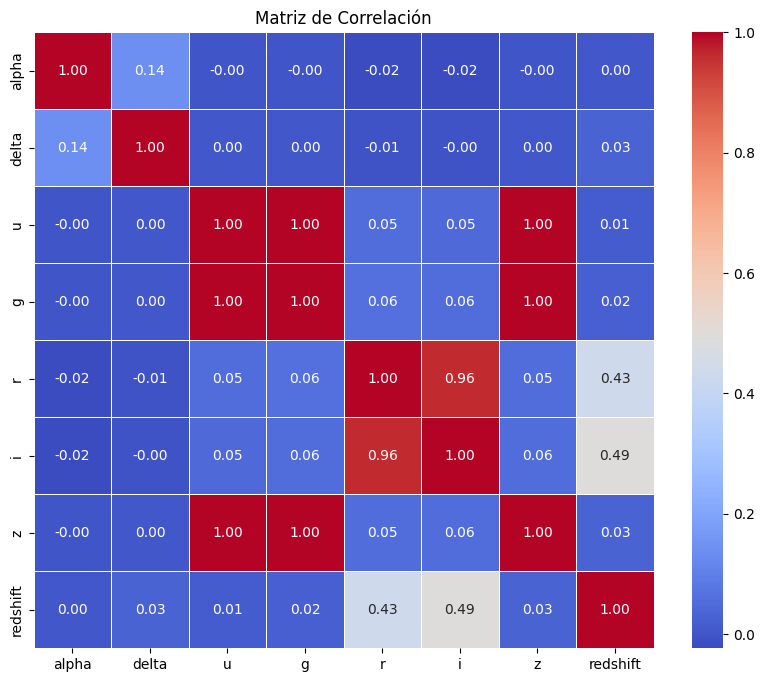


Estadísticas Descriptivas de Características Numéricas:


,alpha,delta,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [ ]:
# Seleccionar solo las columnas numéricas para histogramas y correlación
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Excluir columnas de ID que no son features numéricas
numerical_features_eda = [col for col in numerical_cols if col not in ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']]

print("\nDistribución de Características Numéricas:")
df[numerical_features_eda].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

print("\nMatriz de Correlación de Características Numéricas:")
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features_eda].corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

# También podemos ver estadísticas descriptivas detalladas para las características numéricas
print("\nEstadísticas Descriptivas de Características Numéricas:")
display(df[numerical_features_eda].describe())

## 2. Definición del Modelo y Funciones Auxiliares

En esta sección definimos:
- **make_mlp**: Constructor de arquitectura MLP (Multi-Layer Perceptron)
- **Métricas de regresión**: MAE, R² para evaluar el rendimiento
- **set_seed**: Función para reproducibilidad de resultados

In [ ]:
# === ARQUITECTURA DEL MODELO Y MÉTRICAS ===
#Construye la red neuronal del MLP
#Recibe la dimension de entrada, la capa oculta y la dimension de salida
def make_mlp(d_in: int, d_hidden=(64, 64), d_out=1, dropout=0.0, act=nn.ReLU):
    layers = []
    d_prev = d_in

    # Construir capas ocultas
    for h in d_hidden:
        layers += [nn.Linear(d_prev, h), act()]  # Capa lineal + activación
        if dropout > 0:
            layers += [nn.Dropout(dropout)]       # Dropout para regularización
        d_prev = h

    # Capa de salida (sin activación, se aplica en la función de pérdida)
    layers += [nn.Linear(d_prev, d_out)]

    return nn.Sequential(*layers)

#Calcula el Error Absoluto Medio (MAE - Mean Absolute Error)
#En este caso en especifico indica cuántos años en promedio se desvían las predicciones.
@torch.no_grad()
def mae_metric(preds, y_true):
    return (preds.view(-1) - y_true.view(-1)).abs().mean().item()


#Calcula el coeficiente de determinación R², indica qué proporción de la varianza en la variable dependiente es predecible desde la(s) variable(s) independiente(s).
@torch.no_grad()
def r2_metric(preds, y_true):
    y_true = y_true.view(-1)
    preds = preds.view(-1)

    # Suma de cuadrados de residuos (diferencia entre real y predicho)
    ss_res = ((y_true - preds) ** 2).sum()

    # Suma total de cuadrados (diferencia entre real y media)
    ss_tot = ((y_true - y_true.mean()) ** 2).sum()

    # R² = 1 - (SS_res / SS_tot)
    return (1 - ss_res / (ss_tot + 1e-8)).item()

#Establece la semilla aleatoria
def set_seed(seed=42):
    import random
    random.seed(seed)           # Python random
    np.random.seed(seed)        # NumPy random
    torch.manual_seed(seed)     # PyTorch CPU random

    # PyTorch GPU random (si está disponible)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

#Preprocesamiento de datos para clasificación
Preparar los datos para el entrenamiento de la red neuronal, incluyendo:

- Manejo de características categóricas (la columna 'class').
- Normalización de características numéricas.
- División del dataset en conjuntos de entrenamiento, validación y prueba.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify features and target
target_col = 'class'
# Exclude identifier columns that are not features
feature_cols = [col for col in df.columns if col not in [target_col, 'obj_ID', 'plate', 'MJD', 'fiber_ID']]

X = df[feature_cols]
y = df[target_col]

# 1. Manejo de características categóricas (la columna 'class').
# Label encode the target variable 'class'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"Original classes: {label_encoder.classes_}")
print(f"Encoded target shape: {y_encoded.shape}")

# Identify numerical features (all remaining features are numerical in this dataset)
numerical_features = X.columns.tolist()
print(f"\nNumerical features: {numerical_features}")

# 5. División del dataset en conjuntos de entrenamiento, validación y prueba.
# Split the data into training+validation and test sets
X_trainval, X_test, y_trainval_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Split the training+validation set into training and validation sets
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(
    X_trainval, y_trainval_encoded, test_size=0.25, random_state=42, stratify=y_trainval_encoded
) # 0.25 of 0.8 is 0.2

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train_encoded: {y_train_encoded.shape}")
print(f"Shape of y_val_encoded: {y_val_encoded.shape}")
print(f"Shape of y_test_encoded: {y_test_encoded.shape}")

# 3. Normalización de características numéricas.
# Initialize and fit StandardScaler on the numerical features of the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])

# 4. Apply the fitted scaler to transform the numerical features in the validation and test sets
X_val_scaled = scaler.transform(X_val[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

print(f"\nShape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_val_scaled: {X_val_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

# ============================================================================
# BALANCEO DE CLASES (NUEVO)
# ============================================================================
print(f"\n{'='*80}")
print("BALANCEO DE CLASES EN CONJUNTO DE ENTRENAMIENTO")
print(f"{'='*80}")

# Verificar distribución original de clases en train
unique_train, counts_train = np.unique(y_train_encoded, return_counts=True)
print(f"\nDistribución ORIGINAL en Train:")
for cls, cnt in zip(label_encoder.classes_[unique_train], counts_train):
    print(f"  {cls}: {cnt} muestras ({cnt/len(y_train_encoded)*100:.2f}%)")

# Estrategia de balanceo: IGUALAR TODAS LAS CLASES A 12,956 (tamaño de STAR)
# - GALAXY (clase 0): Undersampling a 12,956 muestras
# - QSO (clase 1): Oversampling a 12,956 muestras
# - STAR (clase 2): Mantener en 12,956 muestras (sin cambios)

TARGET_SAMPLES = 12956  # Número objetivo de muestras por clase

# Aplicar undersampling a GALAXY y luego oversampling a QSO
# Estrategia combinada
sampling_strategy = {
    0: TARGET_SAMPLES,  # GALAXY: undersample a 12,956
    1: TARGET_SAMPLES,  # QSO: oversample a 12,956
    2: TARGET_SAMPLES   # STAR: mantener en 12,956
}

# Primero undersampling
undersampler = RandomUnderSampler(sampling_strategy={0: TARGET_SAMPLES, 2: TARGET_SAMPLES}, random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train_encoded)

print(f"\nDespués de UNDERSAMPLING (GALAXY):")
unique_under, counts_under = np.unique(y_train_under, return_counts=True)
for cls, cnt in zip(label_encoder.classes_[unique_under], counts_under):
    print(f"  {cls}: {cnt} muestras ({cnt/len(y_train_under)*100:.2f}%)")

# Luego oversampling a QSO
oversampler = RandomOverSampler(sampling_strategy={1: TARGET_SAMPLES}, random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_under, y_train_under)

print(f"\nDespués de OVERSAMPLING (QSO) - BALANCEO FINAL:")
unique_final, counts_final = np.unique(y_train_balanced, return_counts=True)
for cls, cnt in zip(label_encoder.classes_[unique_final], counts_final):
    print(f"  {cls}: {cnt} muestras ({cnt/len(y_train_balanced)*100:.2f}%)")

print(f"\nTotal de muestras de entrenamiento:")
print(f"  Original: {len(y_train_encoded)}")
print(f"  Balanceado: {len(y_train_balanced)}")
print(f"  Muestras por clase: {TARGET_SAMPLES}")
print(f"  Número de clases: {len(unique_final)}")
print(f"  Balance perfecto: {len(y_train_balanced) == TARGET_SAMPLES * len(unique_final)}")
print(f"{'='*80}\n")

# IMPORTANTE: Validación y Test NO se modifican para evaluación imparcial

# 6. Convert the resulting NumPy arrays for features and labels into PyTorch TensorDataset objects
# Usamos los datos BALANCEADOS para train
train_dataset = TensorDataset(
    torch.tensor(X_train_balanced, dtype=torch.float32), 
    torch.tensor(y_train_balanced, dtype=torch.long)
)
val_dataset = TensorDataset(
    torch.tensor(X_val_scaled, dtype=torch.float32), 
    torch.tensor(y_val_encoded, dtype=torch.long)
)
test_dataset = TensorDataset(
    torch.tensor(X_test_scaled, dtype=torch.float32), 
    torch.tensor(y_test_encoded, dtype=torch.long)
)

# 7. Print the shapes of the resulting TensorDatasets
print(f"Shape of train_dataset (BALANCED): {train_dataset.tensors[0].shape}, {train_dataset.tensors[1].shape}")
print(f"Shape of val_dataset: {val_dataset.tensors[0].shape}, {val_dataset.tensors[1].shape}")
print(f"Shape of test_dataset: {test_dataset.tensors[0].shape}, {test_dataset.tensors[1].shape}")

In [ ]:
# === VISUALIZACIÓN DEL BALANCEO DE CLASES ===

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Comparación ANTES vs DESPUÉS del balanceo
ax1 = axes[0]
width = 0.35
x = np.arange(len(label_encoder.classes_))

# Antes del balanceo
counts_before = [counts_train[i] for i in range(len(label_encoder.classes_))]
# Después del balanceo
counts_after = [counts_final[i] for i in range(len(label_encoder.classes_))]

bars1 = ax1.bar(x - width/2, counts_before, width, label='Antes', color='#e74c3c', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, counts_after, width, label='Después', color='#2ecc71', alpha=0.8, edgecolor='black')

ax1.set_xlabel('Clase', fontsize=12, fontweight='bold')
ax1.set_ylabel('Número de Muestras', fontsize=12, fontweight='bold')
ax1.set_title('Distribución de Clases: ANTES vs DESPUÉS del Balanceo', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(label_encoder.classes_)
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Gráfico 2: Porcentaje de distribución
ax2 = axes[1]
labels = label_encoder.classes_
sizes_before = [(count/sum(counts_before))*100 for count in counts_before]
sizes_after = [(count/sum(counts_after))*100 for count in counts_after]

x_pos = np.arange(len(labels))
width = 0.35

bars1 = ax2.bar(x_pos - width/2, sizes_before, width, label='Antes', color='#e74c3c', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x_pos + width/2, sizes_after, width, label='Después', color='#2ecc71', alpha=0.8, edgecolor='black')

ax2.set_xlabel('Clase', fontsize=12, fontweight='bold')
ax2.set_ylabel('Porcentaje (%)', fontsize=12, fontweight='bold')
ax2.set_title('Porcentaje de Distribución por Clase', fontsize=13, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('class_balancing_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'\n{"="*80}')
print('ANÁLISIS DEL BALANCEO DE CLASES')
print(f'{"="*80}')
print(f'\nIMPACTO DEL BALANCEO:')
for i, cls in enumerate(label_encoder.classes_):
    before = counts_before[i]
    after = counts_after[i]
    change = ((after - before) / before) * 100
    print(f'  {cls:8} | Antes: {before:6d} ({sizes_before[i]:5.2f}%) | '
          f'Después: {after:6d} ({sizes_after[i]:5.2f}%) | Cambio: {change:+7.2f}%')
print(f'{"="*80}\n')

#2.- Red Neuronal
esta celda configura la arquitectura de la red neuronal MLP para el problema de clasificación de masas estelares y crea una instancia de ese modelo lista para ser entrenada.

In [ ]:
# === MODELO DE RED NEURONAL PARA CLASIFICACIÓN MULTI-CLASE ===
# Clase que define la red neuronal para clasificación
class FFNN_Classifier(nn.Module):
    # Inicializa el modelo FFNN para clasificación multi-clase.
    # d0: Número de neuronas de entrada (características)
    # d1: Número de neuronas en la primera capa oculta
    # d2: Número de neuronas en la segunda capa oculta
    # n_classes: Número de clases de salida
    # dropout: Tasa de dropout para regularización
    def __init__(self, d0, d1=64, d2=64, n_classes=3, dropout=0.0):
        super().__init__()

        # Construir la red usando make_mlp
        # La capa de salida debe tener 'n_classes' neuronas para clasificación multi-clase
        # No aplicamos activación en la capa de salida; CrossEntropyLoss lo maneja
        self.net = make_mlp(
            d_in=d0,           # Features de entrada
            d_hidden=(d1, d2), # Dos capas ocultas
            d_out=n_classes,   # Salida: número de clases
            dropout=dropout    # Regularización
        )

    # Pasa la entrada a través de la red
    def forward(self, x):
        # La salida son logits (puntuaciones) antes de la softmax
        return self.net(x)

# Obtener el número de características de entrada desde el dataset de entrenamiento
d_in_classifier = train_dataset.tensors[0].shape[1]

# El número de clases es 3 (GALAXY, STAR, QSO)
n_classes = 3

# Configuración del modelo clasificador
d_hidden1_classifier = 64
d_hidden2_classifier = 64

# Crear instancia del modelo clasificador
classifier_model = FFNN_Classifier(
    d0=d_in_classifier,
    d1=d_hidden1_classifier,
    d2=d_hidden2_classifier,
    n_classes=n_classes,
    dropout=0.0 # Empezamos sin dropout, como en el baseline
)

print(f"\n Arquitectura del clasificador: {d_in_classifier} → {d_hidden1_classifier} → {d_hidden2_classifier} → {n_classes}")
print(f" Parámetros del clasificador: {sum(p.numel() for p in classifier_model.parameters()):,}")


📐 Arquitectura del clasificador: 13 → 64 → 64 → 3
🔢 Parámetros del clasificador: 5,251


# 3. Función de Entrenamiento Principal


### 3.1. Registro de Experimentos (`results_registry`)
Diccionario que almacena todos los experimentos y sus métricas para posterior comparación.

### 3.2. Funciones de Inicialización de Pesos

**Inicialización Xavier (Glorot)**:
- Mantiene la varianza constante entre capas
- Óptima para activaciones tanh y sigmoid
- Fórmula: W ~ Uniforme[-√(6/(fan_in + fan_out)), √(6/(fan_in + fan_out))]

**Inicialización He (Kaiming)**:
- Diseñada específicamente para ReLU y sus variantes
- Compensa la pérdida de varianza causada por ReLU (que pone a cero la mitad de activaciones)
- Fórmula: W ~ Normal(0, √(2/fan_in))

In [ ]:
# === DEFINICIONES Y VARIABLES GLOBALES ===

# Inicialización del Registro de Experimentos
# Este diccionario almacena todos los experimentos y sus métricas para posterior comparación
results_registry = {
    'experiments': [],  # Lista de experimentos (modelo, historial, configuración)
    'metrics': []       # Lista de métricas de cada experimento
}

print('  Registro de experimentos inicializado')


# === FUNCIONES DE INICIALIZACIÓN DE PESOS ===

def init_weights_xavier(m):
    """
    Inicialización Xavier (también conocida como Glorot).

    Esta inicialización mantiene la varianza de las activaciones constante
    a través de las capas, ayudando a evitar el problema de gradientes
    que desaparecen o explotan.
    """
    if isinstance(m, nn.Linear):
        # Inicializar pesos con distribución uniforme Xavier
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            # Inicializar bias en cero
            nn.init.constant_(m.bias, 0)


def init_weights_he(m):
    """
    Inicialización He (también conocida como Kaiming).

    Esta inicialización está específicamente diseñada para funciones
    de activación ReLU y sus variantes (Leaky ReLU, PReLU, etc.).
    """
    if isinstance(m, nn.Linear):
        # Inicializar pesos con distribución normal He
        # 'fan_in' usa el número de neuronas de entrada
        # 'relu' indica que se usará con activación ReLU
        nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
        if m.bias is not None:
            # Inicializar bias en cero
            nn.init.constant_(m.bias, 0)


print(' Funciones de inicialización definidas:')
print('  - init_weights_xavier(): Para activaciones tanh/sigmoid')
print('  - init_weights_he(): Para activaciones ReLU (recomendada)')
print('\n✓ Listo para ejecutar experimentos')

📊 Registro de experimentos inicializado
 Funciones de inicialización definidas:
  - init_weights_xavier(): Para activaciones tanh/sigmoid
  - init_weights_he(): Para activaciones ReLU (recomendada)

✓ Listo para ejecutar experimentos


## 3.3.- Función de Entrenamiento Principal y Evaluación
- **`fit_classifier()`**: Implementa el ciclo de entrenamiento con early stopping, validación y guardado del mejor modelo.

- **`evaluate_classification()`**: Calcula métricas de rendimiento (Accuracy, F1, Precision, Recall) en un dataset.

- **`register_experiment_classifier()` / `compare_experiments_classifier()`**: Funciones para registrar y comparar los resultados de diferentes experimentos.

Tambien ejecuto el modelo base para tener un punto desde el cual comparar

Modelo compilado con torch.compile para mejor rendimiento
[005] loss=0.1240 accuracy=0.9626 | val_loss=0.1130 val_accuracy=0.9654
[010] loss=0.1107 accuracy=0.9667 | val_loss=0.1058 val_accuracy=0.9668
[015] loss=0.1047 accuracy=0.9680 | val_loss=0.0963 val_accuracy=0.9701
[020] loss=0.1027 accuracy=0.9686 | val_loss=0.1046 val_accuracy=0.9673
[025] loss=0.0975 accuracy=0.9701 | val_loss=0.0967 val_accuracy=0.9704
[030] loss=0.0964 accuracy=0.9704 | val_loss=0.0953 val_accuracy=0.9703
[035] loss=0.0953 accuracy=0.9708 | val_loss=0.0993 val_accuracy=0.9696
[040] loss=0.0932 accuracy=0.9709 | val_loss=0.0945 val_accuracy=0.9714
[045] loss=0.0911 accuracy=0.9714 | val_loss=0.0926 val_accuracy=0.9714
 Early stopping en época 48 (mejor época: 38)
 Modelo restaurado a época 38 (mejor val_loss: 0.0911)


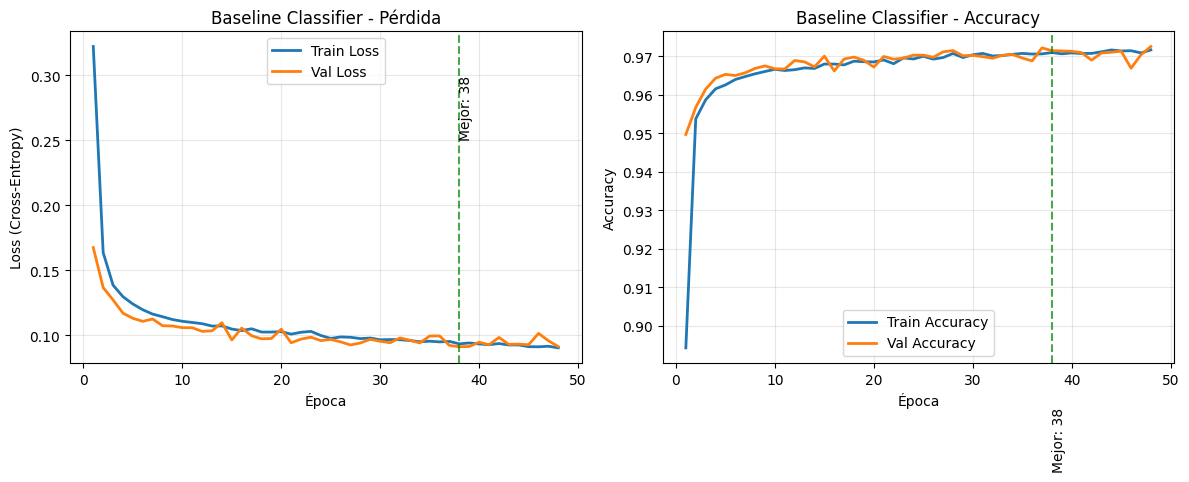

   - Accuracy en validación: 0.9726
   - Performance Gap (train - val accuracy): 0.0009
Overfitting bajo - Modelo generaliza bien

Métricas del Baseline Classifier:
  Train Loss: 0.0852
  Train Accuracy: 0.9735
  Train Precision (weighted): 0.9735
  Train Recall (weighted): 0.9735
  Train F1-score (weighted): 0.9734
  Val Loss: 0.0911
  Val Accuracy: 0.9726
  Val Precision (weighted): 0.9725
  Val Recall (weighted): 0.9726
  Val F1-score (weighted): 0.9725

 COMPARACIÓN DE EXPERIMENTOS DE CLASIFICACIÓN


,name,train_accuracy,val_accuracy,val_precision,val_recall,val_f1,performance_gap
0,Baseline_Classifier,0.973517,0.9726,0.972513,0.9726,0.97247,0.000917



 Mejor modelo (basado en Val Accuracy): Baseline_Classifier (Val Accuracy = 0.9726)

✓ Subtarea completada: Funciones de entrenamiento/evaluación y baseline adaptados para clasificación.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# === FUNCIÓN DE ENTRENAMIENTO PARA CLASIFICACIÓN ===
# Adapta la función de entrenamiento para clasificación multi-clase
def fit_classifier(model, train_ds, val_ds=None, *, epochs=100, batch_size=64, lr=1e-3,
                   patience=10, min_delta=1e-4, ckpt_path=None, compile_model=True, weight_decay=0.0):

    model.to(DEVICE)

    if compile_model and hasattr(torch, 'compile'):
        try:
            model = torch.compile(model)
            print("Modelo compilado con torch.compile para mejor rendimiento")
        except Exception as e:
            print(f' torch.compile no disponible: {e}')

    # Configuración para clasificación multi-clase
    # Usamos CrossEntropyLoss que combina LogSoftmax y NLLLoss
    criterion = nn.CrossEntropyLoss()

    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    best = math.inf # Para early stopping basado en validation loss
    best_epoch = None
    best_state = None

    history = {
        'epoch': [],
        'loss': [],
        'accuracy': [], # Usamos accuracy como métrica principal
        'val_loss': [],
        'val_accuracy': []
    }

    for epoch in range(1, epochs + 1):
        # --- FASE DE ENTRENAMIENTO ---
        model.train()
        epoch_loss = 0.0
        n = 0
        all_train_preds = []
        all_train_y = []

        for xb, yb in train_loader:
            xb = xb.to(DEVICE)
            yb = yb.to(DEVICE)

            # Forward pass: obtener logits
            preds = model(xb)

            # Calcular pérdida (Cross-Entropy)
            # yb debe ser de tipo LongTensor
            loss = criterion(preds, yb.long())

            # Para calcular métricas, obtenemos la clase predicha
            _, predicted_classes = torch.max(preds.detach().cpu(), 1)
            all_train_preds.append(predicted_classes.numpy())
            all_train_y.append(yb.cpu().numpy())

            opt.zero_grad(set_to_none=True)
            loss.backward()
            opt.step()

            epoch_loss += loss.item() * xb.size(0)
            n += xb.size(0)

        # Calcular métricas de entrenamiento
        tr_loss = epoch_loss / n
        # Concatenar predicciones y etiquetas reales para calcular métricas globales
        train_y_true = np.concatenate(all_train_y)
        train_y_pred = np.concatenate(all_train_preds)
        tr_accuracy = accuracy_score(train_y_true, train_y_pred)


        # --- FASE DE VALIDACIÓN ---
        if val_ds is not None:
            model.eval()
            xb, yb = val_ds[:]
            xb = xb.to(DEVICE)
            yb = yb.to(DEVICE)

            with torch.no_grad():
                preds = model(xb)
                val_loss = criterion(preds, yb.long()).item() # yb debe ser LongTensor

                # Para calcular métricas de validación
                _, predicted_classes = torch.max(preds.cpu(), 1)
                val_accuracy = accuracy_score(yb.cpu().numpy(), predicted_classes.numpy())

            # Early stopping: guardar mejor modelo basado en validation loss
            if val_loss + min_delta < best:
                best = val_loss
                best_epoch = epoch
                best_state = {k: v.cpu() for k, v in model.state_dict().items()}
                if ckpt_path:
                    torch.save(best_state, ckpt_path)


        # Guardar métricas en historial
        history['epoch'].append(epoch)
        history['loss'].append(tr_loss)
        history['accuracy'].append(tr_accuracy)
        if val_ds is not None:
            history['val_loss'].append(val_loss)
            history['val_accuracy'].append(val_accuracy)


        # Imprimir progreso cada 5 épocas
        if epoch % 5 == 0:
            msg = f"[{epoch:03d}] loss={tr_loss:.4f} accuracy={tr_accuracy:.4f}"
            if val_ds is not None:
                msg += f" | val_loss={val_loss:.4f} val_accuracy={val_accuracy:.4f}"
            print(msg)

        # Early stopping: detener si no hay mejora
        if val_ds is not None and (epoch - (best_epoch or 0)) >= patience:
            print(f" Early stopping en época {epoch} (mejor época: {best_epoch})")
            break

    # Cargar pesos del mejor modelo
    if best_state is not None:
        model.load_state_dict(best_state)
        print(f" Modelo restaurado a época {best_epoch} (mejor val_loss: {best:.4f})")

    return model, history, best_epoch


# === FUNCIÓN DE EVALUACIÓN PARA CLASIFICACIÓN ===
# Evalúa un modelo de clasificación en un dataset con métricas de clasificación
@torch.no_grad()
def evaluate_classification(model, dataset, batch_size=256):
    model.eval()
    loader = DataLoader(dataset, batch_size=batch_size)

    all_y_true = []
    all_y_pred = []
    losses = []
    crit = nn.CrossEntropyLoss()

    for xb, yb in loader:
        xb = xb.to(DEVICE)
        yb = yb.to(DEVICE)

        # Predicciones (logits)
        preds = model(xb)
        loss = crit(preds, yb.long())

        # Obtener la clase predicha
        _, predicted_classes = torch.max(preds.cpu(), 1)

        all_y_true.append(yb.cpu().numpy())
        all_y_pred.append(predicted_classes.numpy())
        losses.append(loss.item())

    # Concatenar todos los resultados
    y_true = np.concatenate(all_y_true)
    y_pred = np.concatenate(all_y_pred)

    # Calcular métricas de clasificación
    accuracy = accuracy_score(y_true, y_pred)
    # Calcular Precision, Recall y F1-score. Usamos 'weighted' average due to class imbalance
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)


    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'loss': float(np.mean(losses)),
        'y_true': y_true,
        'y_pred': y_pred
    }

# Modificar la función register_experiment para registrar métricas de clasificación
def register_experiment_classifier(name, description, model, history, train_metrics, val_metrics):
    results_registry['experiments'].append({
        'name': name,
        'description': description,
        'model': model,
        'history': history
    })

    results_registry['metrics'].append({
        'name': name,
        'train_accuracy': train_metrics['accuracy'],
        'train_precision': train_metrics['precision'],
        'train_recall': train_metrics['recall'],
        'train_f1': train_metrics['f1_score'],
        'val_accuracy': val_metrics['accuracy'],
        'val_precision': val_metrics['precision'],
        'val_recall': val_metrics['recall'],
        'val_f1': val_metrics['f1_score'],
        # Para clasificación, podemos usar la diferencia de accuracy como un indicador simple de overfitting/underfitting
        'performance_gap': train_metrics['accuracy'] - val_metrics['accuracy']
    })

# Modificar la función compare_experiments para comparar métricas de clasificación
def compare_experiments_classifier():
    import pandas as pd

    df_metrics = pd.DataFrame(results_registry['metrics'])

    print("\n" + "="*100)
    print(" COMPARACIÓN DE EXPERIMENTOS DE CLASIFICACIÓN")
    print("="*100)
    # Mostrar solo métricas relevantes para clasificación
    display(df_metrics[['name', 'train_accuracy', 'val_accuracy', 'val_precision', 'val_recall', 'val_f1', 'performance_gap']])
    print("="*100)

    # Identificar mejor modelo basado en validation accuracy (o F1-score si se prefiere)
    # Para clasificación, mayor accuracy es mejor
    best_idx = df_metrics['val_accuracy'].idxmax()
    best_name = df_metrics.loc[best_idx, 'name']
    best_accuracy = df_metrics.loc[best_idx, 'val_accuracy']

    print(f"\n Mejor modelo (basado en Val Accuracy): {best_name} (Val Accuracy = {best_accuracy:.4f})")

    return df_metrics


# === ENTRENAR Y EVALUAR MODELO BASELINE PARA CLASIFICACIÓN ===

# Configuración del baseline clasificador
# Usamos la clase FFNN_Classifier definida anteriormente
baseline_classifier_model = FFNN_Classifier(
    d0=d_in_classifier,
    d1=d_hidden1_classifier,
    d2=d_hidden2_classifier,
    n_classes=n_classes,
    dropout=0.0 # SIN dropout para el baseline PARA TENER EN CUENTA EN LOS PROXIMOS ENTRENAMIENTOS
)


# Entrenar modelo baseline clasificador
# Usamos la nueva función fit_classifier
baseline_classifier_model, baseline_classifier_history, baseline_classifier_best_epoch = fit_classifier(
    model=baseline_classifier_model,
    train_ds=train_dataset,
    val_ds=val_dataset,
    epochs=100, # Reducimos las épocas para un baseline inicial
    batch_size=64,
    lr=1e-3,
    patience=10,
    weight_decay=0.0,  # SIN regularización L2 PARA TENER EN CUENTA EN LOS PROXIMOS ENTRENAMIENTOS
    compile_model=True #Con true ejecuta pytorch2
)

# Evaluar en train y validation
# Usamos la nueva función evaluate_classification
baseline_classifier_train_metrics = evaluate_classification(baseline_classifier_model, train_dataset)
baseline_classifier_val_metrics = evaluate_classification(baseline_classifier_model, val_dataset)

# Registrar experimento
# Usamos la nueva función register_experiment_classifier
register_experiment_classifier(
    name="Baseline_Classifier",
    description="Clasificador sin mejoras",
    model=baseline_classifier_model,
    history=baseline_classifier_history,
    train_metrics=baseline_classifier_train_metrics,
    val_metrics=baseline_classifier_val_metrics
)

# Visualizar curvas de aprendizaje para clasificación
# Adaptar la función de plotting si es necesario, o usar métricas adecuadas
# Por ahora, podemos plotear loss y accuracy
def plot_classifier_history(h, best_epoch=None, title='Historial de Entrenamiento Clasificador'):
    x = h['epoch']
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, h['loss'], label='Train Loss', linewidth=2)
    if h.get('val_loss') and len(h['val_loss']) == len(x):
        plt.plot(x, h['val_loss'], label='Val Loss', linewidth=2)
    if best_epoch:
        plt.axvline(best_epoch, linestyle='--', color='green', alpha=0.7)
        plt.text(best_epoch, plt.ylim()[1]*0.9, f"Mejor: {best_epoch}",
                rotation=90, va='top', fontsize=10)
    plt.xlabel('Época')
    plt.ylabel('Loss (Cross-Entropy)')
    plt.title(f'{title} - Pérdida')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(x, h['accuracy'], label='Train Accuracy', linewidth=2)
    if h.get('val_accuracy') and len(h['val_accuracy']) == len(x):
        plt.plot(x, h['val_accuracy'], label='Val Accuracy', linewidth=2)
    if best_epoch:
        plt.axvline(best_epoch, linestyle='--', color='green', alpha=0.7)
        plt.text(best_epoch, plt.ylim()[1]*0.9, f"Mejor: {best_epoch}",
                rotation=90, va='top', fontsize=10)
    plt.xlabel('Época')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_classifier_history(baseline_classifier_history, best_epoch=baseline_classifier_best_epoch, title='Baseline Classifier')


# Análisis de overfitting para clasificación
performance_gap = baseline_classifier_train_metrics['accuracy'] - baseline_classifier_val_metrics['accuracy']

print(f"   - Accuracy en validación: {baseline_classifier_val_metrics['accuracy']:.4f}")
print(f"   - Performance Gap (train - val accuracy): {performance_gap:.4f}")

if performance_gap > 0.1: # Umbral de overfitting para accuracy
    print("OVERFITTING SIGNIFICATIVO - Necesitamos regularización")
elif performance_gap > 0.05:
    print("OVERFITTING MODERADO - Regularización podría ayudar")
else:
    print("Overfitting bajo - Modelo generaliza bien")

# Mostrar métricas completas del baseline
print("\nMétricas del Baseline Classifier:")
print(f"  Train Loss: {baseline_classifier_train_metrics['loss']:.4f}")
print(f"  Train Accuracy: {baseline_classifier_train_metrics['accuracy']:.4f}")
print(f"  Train Precision (weighted): {baseline_classifier_train_metrics['precision']:.4f}")
print(f"  Train Recall (weighted): {baseline_classifier_train_metrics['recall']:.4f}")
print(f"  Train F1-score (weighted): {baseline_classifier_train_metrics['f1_score']:.4f}")

print(f"  Val Loss: {baseline_classifier_val_metrics['loss']:.4f}")
print(f"  Val Accuracy: {baseline_classifier_val_metrics['accuracy']:.4f}")
print(f"  Val Precision (weighted): {baseline_classifier_val_metrics['precision']:.4f}")
print(f"  Val Recall (weighted): {baseline_classifier_val_metrics['recall']:.4f}")
print(f"  Val F1-score (weighted): {baseline_classifier_val_metrics['f1_score']:.4f}")

# Comparar experimentos (ahora con métricas de clasificación)
compare_experiments_classifier()

print("\n✓ Subtarea completada: Funciones de entrenamiento/evaluación y baseline adaptados para clasificación.")

---

# EXPERIMENTO 1: Regularización L2 (Weight Decay)

Añadí un término al loss que penaliza la magnitud de los pesos de la siguiente forma

```python
optimizer = torch.optim.AdamW(model.parameters(),
                               lr=1e-3,
                               weight_decay=1e-4)  # ← Aquí está L2
```

## Lo que haremos

Probaremos **4 valores diferentes** de weight_decay:
- `1e-5` (muy suave)
- `1e-4` (moderado)
- `1e-3` (fuerte)
- `1e-2` (muy fuerte)

Y seleccionaremos el que dé mejor **Validation Accuracy**.


EXPERIMENTO 1: REGULARIZACIÓN L2 PARA CLASIFICACIÓN
Modelo compilado con torch.compile para mejor rendimiento
[005] loss=0.1226 accuracy=0.9634 | val_loss=0.1172 val_accuracy=0.9632
[010] loss=0.1103 accuracy=0.9669 | val_loss=0.1112 val_accuracy=0.9647
[015] loss=0.1074 accuracy=0.9672 | val_loss=0.0965 val_accuracy=0.9714
[020] loss=0.1009 accuracy=0.9692 | val_loss=0.1051 val_accuracy=0.9682
[025] loss=0.0983 accuracy=0.9696 | val_loss=0.0947 val_accuracy=0.9709
[030] loss=0.0967 accuracy=0.9697 | val_loss=0.0927 val_accuracy=0.9716
 Early stopping en época 32 (mejor época: 22)
 Modelo restaurado a época 22 (mejor val_loss: 0.0926)
Modelo compilado con torch.compile para mejor rendimiento
[005] loss=0.1225 accuracy=0.9634 | val_loss=0.1172 val_accuracy=0.9633
[010] loss=0.1100 accuracy=0.9669 | val_loss=0.1105 val_accuracy=0.9649
[015] loss=0.1073 accuracy=0.9672 | val_loss=0.0960 val_accuracy=0.9714
[020] loss=0.1011 accuracy=0.9693 | val_loss=0.1039 val_accuracy=0.9685
[025] loss

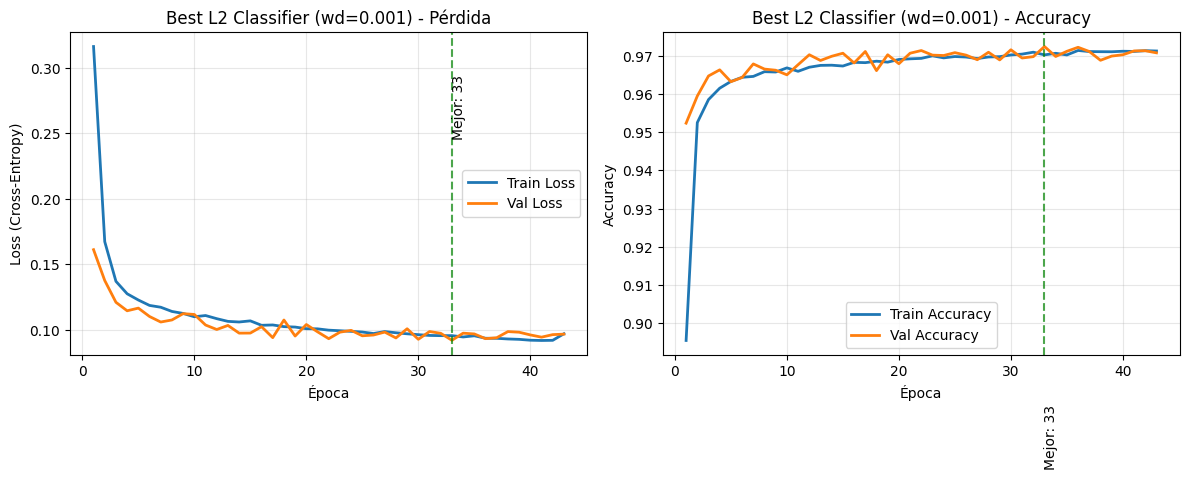

   NO INCLUIR L2
   → No hay mejora o empeora el rendimiento: -0.0019

✓ Experimento 1 (L2 para Clasificación) completado


In [ ]:
# === EXPERIMENTO 1 ADAPTADO: REGULARIZACIÓN L2 PARA CLASIFICACIÓN ===

print("\n" + "="*80)
print("EXPERIMENTO 1: REGULARIZACIÓN L2 PARA CLASIFICACIÓN")
print("="*80)

# Valores de weight_decay a probar
weight_decay_values_clf = [1e-5, 1e-4, 1e-3, 1e-2]

# Almacenar resultados de este experimento
l2_classifier_results = []

# Probar cada valor de peso
for wd_clf in weight_decay_values_clf:

    # Fijar semilla para reproducibilidad
    set_seed(42)

    # Crear modelo (misma arquitectura que baseline clasificador)
    model_l2_clf = FFNN_Classifier(
        d0=d_in_classifier,
        d1=d_hidden1_classifier,
        d2=d_hidden2_classifier,
        n_classes=n_classes,
        dropout=0.0 # Sin dropout en este experimento
    )

    # Entrenar con regularización L2 usando fit_classifier
    model_l2_clf, history_l2_clf, best_epoch_l2_clf = fit_classifier(
        model=model_l2_clf,
        train_ds=train_dataset,
        val_ds=val_dataset,
        epochs=100, # Usar el mismo número de épocas que el baseline
        batch_size=64,
        lr=1e-3,
        patience=10,
        weight_decay=wd_clf,  # REGULARIZACIÓN L2, varia en cada ciclo
        compile_model=True
    )

    # Evaluar usando evaluate_classification
    train_metrics_l2_clf = evaluate_classification(model_l2_clf, train_dataset)
    val_metrics_l2_clf = evaluate_classification(model_l2_clf, val_dataset)

    # Guardar resultados
    l2_classifier_results.append({
        'weight_decay': wd_clf,
        'model': model_l2_clf,
        'history': history_l2_clf,
        'best_epoch': best_epoch_l2_clf,
        'train_metrics': train_metrics_l2_clf,
        'val_metrics': val_metrics_l2_clf
    })

    # Registrar experimento usando register_experiment_classifier
    register_experiment_classifier(
        name=f"L2_Classifier_{wd_clf}",
        description=f"Clasificador con Weight decay = {wd_clf}",
        model=model_l2_clf,
        history=history_l2_clf,
        train_metrics=train_metrics_l2_clf,
        val_metrics=val_metrics_l2_clf
    )

# ===  COMPARACIÓN Y SELECCIÓN DEL MEJOR WEIGHT_DECAY PARA CLASIFICACIÓN ===

print("\n" + "="*80)
print("COMPARACIÓN DE RESULTADOS L2 PARA CLASIFICACIÓN")
print("="*80)

# Imprimir resumen de resultados L2
print(f"{'Weight Decay':<15} {'Train Acc':>12} {'Val Acc':>12} {'Val F1':>12} {'Perf Gap':>12}")
print("-"*70)
for res in l2_classifier_results:
    wd_clf = res['weight_decay']
    train_acc = res['train_metrics']['accuracy']
    val_acc = res['val_metrics']['accuracy']
    val_f1 = res['val_metrics']['f1_score']
    performance_gap = res['train_metrics']['accuracy'] - res['val_metrics']['accuracy']

    print(f"{wd_clf:<15.0e} {train_acc:>12.4f} {val_acc:>12.4f} {val_f1:>12.4f} {performance_gap:>12.4f}")

print("-"*70)

# Encontrar mejor weight_decay basado en Val Accuracy
best_l2_classifier_result = max(l2_classifier_results, key=lambda x: x['val_metrics']['accuracy'])
best_wd_classifier = best_l2_classifier_result['weight_decay']
best_val_accuracy_l2_clf = best_l2_classifier_result['val_metrics']['accuracy']

print(f"\n Mejor weight_decay para clasificación: {best_wd_classifier}")
print(f"   Val Accuracy: {best_val_accuracy_l2_clf:.4f}")

# Comparación con el baseline clasificador
baseline_val_accuracy = baseline_classifier_val_metrics['accuracy']
improvement_l2_clf = best_val_accuracy_l2_clf - baseline_val_accuracy
improvement_pct_l2_clf = (improvement_l2_clf / baseline_val_accuracy) * 100

print(f"   Mejora vs Baseline: {improvement_l2_clf:.4f} ( {improvement_pct_l2_clf:.2f}%)")

# Visualizar curvas de aprendizaje del mejor modelo L2
plot_classifier_history(best_l2_classifier_result['history'], best_epoch=best_l2_classifier_result['best_epoch'], title=f'Best L2 Classifier (wd={best_wd_classifier})')


if improvement_l2_clf > 0.001: # Umbral de mejora para considerar L2
    print(f"   INCLUIR L2 en modelo final")
    print(f"   → Mejora significativa en Val Accuracy: {improvement_l2_clf:.4f}")
    print(f"   → Mejor weight_decay: {best_wd_classifier}")
    selected_wd = best_wd_classifier
    use_l2 = True
elif improvement_l2_clf > 0:
     print(f"    CONSIDERAR L2")
     print(f"   → Mejora marginal: {improvement_l2_clf:.4f}")
     print(f"   → Podría incluirse si reduce el overfitting sin penalizar accuracy")
     # Verificar si reduce overfitting (perf gap)
     best_l2_perf_gap = best_l2_classifier_result['train_metrics']['accuracy'] - best_l2_classifier_result['val_metrics']['accuracy']
     baseline_perf_gap = baseline_classifier_train_metrics['accuracy'] - baseline_classifier_val_metrics['accuracy']
     if best_l2_perf_gap < baseline_perf_gap * 0.9: # Si reduce el gap en más del 10%
         print("   → Además, ayuda a reducir el overfitting.")
         selected_wd = best_wd_classifier
         use_l2 = True
     else:
        print("   → No reduce significativamente el overfitting.")
        selected_wd = 0.0
        use_l2 = False
else:
    print(f"   NO INCLUIR L2")
    print(f"   → No hay mejora o empeora el rendimiento: {improvement_l2_clf:.4f}")
    selected_wd = 0.0
    use_l2 = False

print("\n✓ Experimento 1 (L2 para Clasificación) completado")
print("="*80)


---

# EXPERIMENTO 2: Dropout

Apagamos aleatoriamente un porcentaje de neuronas durante el entrenamiento, forzando a la red a no depender de neuronas específicas. Lo implemento en el modelo de la siguiente forma

## Implementación en PyTorch

```python
model = FFNN_Classifier(dropout=0.3)  # 30% de neuronas desactivadas
```

**4 tasas de dropout**:
- `0.1` (10% - suave)
- `0.2` (20% - moderado)
- `0.3` (30% - estándar)
- `0.5` (50% - agresivo)

Seleccionaremos la tasa que dé mejor **Validation Accuracy** mientras mantenemos el L2 óptimo encontrado en el experimento anterior.


Entrenando clasificador con Dropout = 0.1
----------------------------------------
Modelo compilado con torch.compile para mejor rendimiento
[005] loss=0.1335 accuracy=0.9601 | val_loss=0.1081 val_accuracy=0.9678
[010] loss=0.1155 accuracy=0.9657 | val_loss=0.1010 val_accuracy=0.9685
[015] loss=0.1096 accuracy=0.9669 | val_loss=0.0968 val_accuracy=0.9718
[020] loss=0.1056 accuracy=0.9680 | val_loss=0.0918 val_accuracy=0.9716
[025] loss=0.1026 accuracy=0.9692 | val_loss=0.0910 val_accuracy=0.9718
[030] loss=0.1007 accuracy=0.9697 | val_loss=0.0919 val_accuracy=0.9718
[035] loss=0.0992 accuracy=0.9696 | val_loss=0.0880 val_accuracy=0.9735
[040] loss=0.0995 accuracy=0.9697 | val_loss=0.0914 val_accuracy=0.9718
[045] loss=0.1056 accuracy=0.9701 | val_loss=0.0879 val_accuracy=0.9731
[050] loss=0.0964 accuracy=0.9704 | val_loss=0.0868 val_accuracy=0.9729
[055] loss=0.0962 accuracy=0.9700 | val_loss=0.0894 val_accuracy=0.9731
[060] loss=0.0958 accuracy=0.9705 | val_loss=0.0867 val_accuracy=0

W1111 22:49:27.805000 1421 torch/_dynamo/convert_frame.py:1016] [0/8] torch._dynamo hit config.recompile_limit (8)
W1111 22:49:27.805000 1421 torch/_dynamo/convert_frame.py:1016] [0/8]    function: 'forward' (/tmp/ipython-input-553833330.py:24)
W1111 22:49:27.805000 1421 torch/_dynamo/convert_frame.py:1016] [0/8]    last reason: 0/7: GLOBAL_STATE changed: grad_mode 
W1111 22:49:27.805000 1421 torch/_dynamo/convert_frame.py:1016] [0/8] To log all recompilation reasons, use TORCH_LOGS="recompiles".
W1111 22:49:27.805000 1421 torch/_dynamo/convert_frame.py:1016] [0/8] To diagnose recompilation issues, see https://pytorch.org/docs/main/torch.compiler_troubleshooting.html.


[005] loss=0.1377 accuracy=0.9594 | val_loss=0.1075 val_accuracy=0.9676
[010] loss=0.1186 accuracy=0.9646 | val_loss=0.1005 val_accuracy=0.9682
[015] loss=0.1153 accuracy=0.9663 | val_loss=0.0959 val_accuracy=0.9719
[020] loss=0.1106 accuracy=0.9668 | val_loss=0.0930 val_accuracy=0.9712
[025] loss=0.1072 accuracy=0.9684 | val_loss=0.0910 val_accuracy=0.9721
[030] loss=0.1066 accuracy=0.9683 | val_loss=0.0909 val_accuracy=0.9719
[035] loss=0.1044 accuracy=0.9687 | val_loss=0.0906 val_accuracy=0.9720
[040] loss=0.1044 accuracy=0.9683 | val_loss=0.0918 val_accuracy=0.9716
 Early stopping en época 44 (mejor época: 34)
 Modelo restaurado a época 34 (mejor val_loss: 0.0885)

Entrenando clasificador con Dropout = 0.3
----------------------------------------
Modelo compilado con torch.compile para mejor rendimiento
[005] loss=0.1573 accuracy=0.9572 | val_loss=0.1122 val_accuracy=0.9648
[010] loss=0.1226 accuracy=0.9633 | val_loss=0.0988 val_accuracy=0.9696
[015] loss=0.1233 accuracy=0.9652 | v

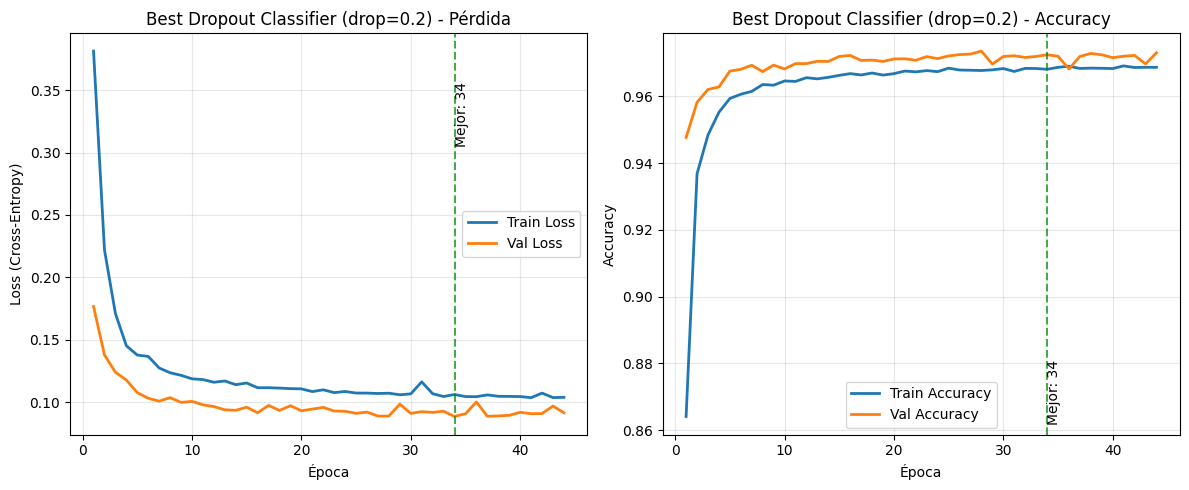

    CONSIDERAR Dropout
   → Mejora marginal: 0.0004
   → Podría incluirse si reduce el overfitting sin penalizar accuracy
   → Además, ayuda a reducir el overfitting.

 Experimento 2 (Dropout para Clasificación) completado


In [ ]:
# Valores de dropout a probar
dropout_values_clf = [0.1, 0.2, 0.3, 0.5]
dropout_classifier_results = []

# Probar cada valor de dropout
for drop_rate_clf in dropout_values_clf:
    print(f"\nEntrenando clasificador con Dropout = {drop_rate_clf}")
    print("-"*40)

    set_seed(42)

    # Crear modelo CON dropout para clasificación
    model_drop_clf = FFNN_Classifier(
        d0=d_in_classifier,
        d1=d_hidden1_classifier,
        d2=d_hidden2_classifier,
        n_classes=n_classes,
        dropout=drop_rate_clf # Dropout cambiante para ir probando
    )

    # Entrenar (con el weight_decay seleccionado en experimento anterior si se decidió usarlo)
    model_drop_clf, history_drop_clf, best_epoch_drop_clf = fit_classifier(
        model=model_drop_clf,
        train_ds=train_dataset,
        val_ds=val_dataset,
        epochs=100,
        batch_size=64,
        lr=1e-3,
        patience=10,
        weight_decay=selected_wd if use_l2 else 0.0, # Usar WD seleccionado
        compile_model=True
    )

    # Evaluar
    train_metrics_drop_clf = evaluate_classification(model_drop_clf, train_dataset)
    val_metrics_drop_clf = evaluate_classification(model_drop_clf, val_dataset)

    dropout_classifier_results.append({
        'dropout': drop_rate_clf,
        'model': model_drop_clf,
        'history': history_drop_clf,
        'best_epoch': best_epoch_drop_clf, # Ensure best_epoch is stored
        'train_metrics': train_metrics_drop_clf,
        'val_metrics': val_metrics_drop_clf
    })

    register_experiment_classifier(
        name=f"Dropout_Classifier_{drop_rate_clf}",
        description=f"Clasificador con Dropout={drop_rate_clf}, WD={selected_wd if use_l2 else 0.0}",
        model=model_drop_clf,
        history=history_drop_clf,
        train_metrics=train_metrics_drop_clf,
        val_metrics=val_metrics_drop_clf
    )



# Imprimir resumen de resultados Dropout
print(f"{'Dropout':<15} {'Train Acc':>12} {'Val Acc':>12} {'Val F1':>12} {'Perf Gap':>12}")
print("-"*70)
for res in dropout_classifier_results:
    drop_rate_clf = res['dropout']
    train_acc = res['train_metrics']['accuracy']
    val_acc = res['val_metrics']['accuracy']
    val_f1 = res['val_metrics']['f1_score']
    performance_gap = res['train_metrics']['accuracy'] - res['val_metrics']['accuracy']

    print(f"{drop_rate_clf:<15.1f} {train_acc:>12.4f} {val_acc:>12.4f} {val_f1:>12.4f} {performance_gap:>12.4f}")

print("-"*70)

# Encontrar mejor dropout basado en Val Accuracy
best_drop_classifier_result = max(dropout_classifier_results, key=lambda x: x['val_metrics']['accuracy'])
best_dropout_rate_classifier = best_drop_classifier_result['dropout']
best_val_accuracy_drop_clf = best_drop_classifier_result['val_metrics']['accuracy']

print(f"\n Mejor dropout para clasificación: {best_dropout_rate_classifier}")
print(f"   Val Accuracy: {best_val_accuracy_drop_clf:.4f}")

# Comparación con el mejor modelo anterior (L2 si se usó, sino Baseline)
baseline_ref_clf = best_l2_classifier_result if use_l2 else {'val_metrics': baseline_classifier_val_metrics}
baseline_acc_ref_clf = baseline_ref_clf['val_metrics']['accuracy']

improvement_drop_clf = best_val_accuracy_drop_clf - baseline_acc_ref_clf

print(f"   Mejora vs anterior: {improvement_drop_clf:.4f}")

# Visualizar curvas de aprendizaje del mejor modelo Dropout
# Access best_epoch from the result dictionary
plot_classifier_history(best_drop_classifier_result['history'], best_epoch=best_drop_classifier_result['best_epoch'], title=f'Best Dropout Classifier (drop={best_dropout_rate_classifier})')

if improvement_drop_clf > 0.001: # Umbral de mejora para considerar Dropout
    print(f"   INCLUIR Dropout en modelo final")
    print(f"   → Mejora significativa en Val Accuracy: {improvement_drop_clf:.4f}")
    print(f"   → Mejor dropout rate: {best_dropout_rate_classifier}")
    selected_dropout = best_dropout_rate_classifier
    use_dropout = True
elif improvement_drop_clf > 0:
     print(f"    CONSIDERAR Dropout")
     print(f"   → Mejora marginal: {improvement_drop_clf:.4f}")
     print(f"   → Podría incluirse si reduce el overfitting sin penalizar accuracy")
     # Verificar si reduce overfitting (perf gap)
     best_drop_perf_gap = best_drop_classifier_result['train_metrics']['accuracy'] - best_drop_classifier_result['val_metrics']['accuracy']

     # Retrieve the performance gap of the reference model from the results_registry
     ref_name = baseline_ref_clf['name'] if use_l2 else "Baseline_Classifier"
     ref_metrics = next(item for item in results_registry['metrics'] if item["name"] == ref_name)
     baseline_perf_gap = ref_metrics['performance_gap']


     if best_drop_perf_gap < baseline_perf_gap * 0.9: # Si reduce el gap en más del 10%
         print("   → Además, ayuda a reducir el overfitting.")
         selected_dropout = best_dropout_rate_classifier
         use_dropout = True
     else:
        print("   → No reduce significativamente el overfitting.")
        selected_dropout = 0.0
        use_dropout = False
else:
    print(f"   NO INCLUIR Dropout")
    print(f"   → No hay mejora o empeora el rendimiento: {improvement_drop_clf:.4f}")
    selected_dropout = 0.0
    use_dropout = False

print("\n Experimento 2 (Dropout para Clasificación) completado")
print("="*80)

---

# EXPERIMENTO 3: Inicializaciones de Pesos (Xavier y He)

## Tipos de Inicialización usados

### 1. Default de PyTorch
- PyTorch usa inicialización uniforme por defecto

### 2. Xavier (Glorot) Initialization

Se utilizó el definido anteriormente

```python
def init_weights_xavier(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
```

### 3. He (Kaiming) Initialization

Se utilizó el definido anteriormente

```python
def init_weights_he(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
```

Compararemos estas inicializaciones:


EXPERIMENTO 3: INICIALIZACIONES PARA CLASIFICACIÓN

Entrenando clasificador con Inicializacion: default
----------------------------------------
Usando inicializacion default de PyTorch
Modelo compilado con torch.compile para mejor rendimiento
[005] loss=0.1226 accuracy=0.9634 | val_loss=0.1172 val_accuracy=0.9632
[010] loss=0.1103 accuracy=0.9669 | val_loss=0.1112 val_accuracy=0.9647
[015] loss=0.1074 accuracy=0.9672 | val_loss=0.0965 val_accuracy=0.9714
[020] loss=0.1009 accuracy=0.9692 | val_loss=0.1051 val_accuracy=0.9682
[025] loss=0.0983 accuracy=0.9696 | val_loss=0.0947 val_accuracy=0.9709
[030] loss=0.0967 accuracy=0.9697 | val_loss=0.0927 val_accuracy=0.9716
 Early stopping en época 32 (mejor época: 22)
 Modelo restaurado a época 22 (mejor val_loss: 0.0926)

Entrenando clasificador con Inicializacion: xavier
----------------------------------------
Inicializacion xavier aplicada
Modelo compilado con torch.compile para mejor rendimiento
[005] loss=0.1241 accuracy=0.9625 | val_

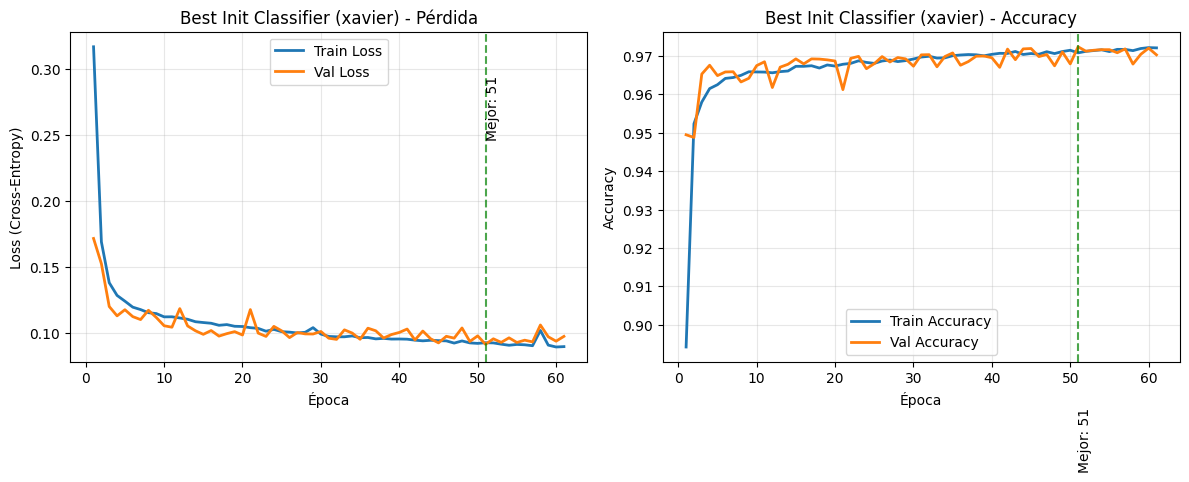


ANÁLISIS Y DECISIÓN PARA INICIALIZACIÓN
   NO INCLUIR inicialización personalizada
   → No hay mejora o empeora el rendimiento: -0.0028


In [ ]:
# === EXPERIMENTO 3 ADAPTADO: INICIALIZACIONES PARA CLASIFICACIÓN ===

print("\n" + "="*80)
print("EXPERIMENTO 3: INICIALIZACIONES PARA CLASIFICACIÓN")
print("="*80)

# Funciones de inicializacion (ya definidas anteriormente)
# init_weights_xavier, init_weights_he

# Lista de inicializaciones a probar
initializations_clf = [
    ('default', None, 'Inicializacion default de PyTorch'),
    ('xavier', init_weights_xavier, 'Inicializacion Xavier (Glorot)'),
    ('he', init_weights_he, 'Inicializacion He (Kaiming) para ReLU')
]

init_classifier_results = []

# Probar cada inicializacion
for init_name_clf, init_fn_clf, init_desc_clf in initializations_clf:
    print(f"\nEntrenando clasificador con Inicializacion: {init_name_clf}")
    print("-"*40)

    set_seed(42)

    # Crear modelo clasificador (con WD y Dropout seleccionados)
    model_init_clf = FFNN_Classifier(
        d0=d_in_classifier,
        d1=d_hidden1_classifier,
        d2=d_hidden2_classifier,
        n_classes=n_classes,
        dropout=0.0
    )

    # Aplicar inicializacion
    if init_fn_clf is not None:
        model_init_clf.apply(init_fn_clf)
        print(f"Inicializacion {init_name_clf} aplicada")
    else:
        print("Usando inicializacion default de PyTorch")


    # Entrenar usando fit_classifier
    model_init_clf, history_init_clf, best_epoch_init_clf = fit_classifier(
        model=model_init_clf,
        train_ds=train_dataset,
        val_ds=val_dataset,
        epochs=100,
        batch_size=64,
        lr=1e-3,
        patience=10,
        weight_decay=0.0,
        compile_model=True
    )

    # Evaluar
    train_metrics_init_clf = evaluate_classification(model_init_clf, train_dataset)
    val_metrics_init_clf = evaluate_classification(model_init_clf, val_dataset)

    init_classifier_results.append({
        'name': init_name_clf,
        'description': init_desc_clf,
        'model': model_init_clf,
        'history': history_init_clf,
        'best_epoch': best_epoch_init_clf,
        'train_metrics': train_metrics_init_clf,
        'val_metrics': val_metrics_init_clf
    })

    register_experiment_classifier(
        name=f"Init_Classifier_{init_name_clf}",
        description=f"Clasificador con {init_desc_clf}, WD={selected_wd if use_l2 else 0.0}, Dropout={selected_dropout if use_dropout else 0.0}",
        model=model_init_clf,
        history=history_init_clf,
        train_metrics=train_metrics_init_clf,
        val_metrics=val_metrics_init_clf
    )


# Imprimir resumen de resultados Inicialización
print(f"{'Initialization':<25} {'Train Acc':>12} {'Val Acc':>12} {'Val F1':>12} {'Perf Gap':>12}")
print("-"*90)
for res in init_classifier_results:
    name_clf = res['name']
    train_acc = res['train_metrics']['accuracy']
    val_acc = res['val_metrics']['accuracy']
    val_f1 = res['val_metrics']['f1_score']
    performance_gap = res['train_metrics']['accuracy'] - res['val_metrics']['accuracy']
    print(f"{name_clf:<25} {train_acc:>12.4f} {val_acc:>12.4f} {val_f1:>12.4f} {performance_gap:>12.4f}")

print("-"*90)

# Mejor inicializacion basado en Val Accuracy
best_init_classifier_result = max(init_classifier_results, key=lambda x: x['val_metrics']['accuracy'])
best_init_name_classifier = best_init_classifier_result['name']
best_val_accuracy_init_clf = best_init_classifier_result['val_metrics']['accuracy']

print(f"\n Mejor inicialización para clasificación: {best_init_name_classifier}")
print(f"   Val Accuracy: {best_val_accuracy_init_clf:.4f}")

if use_dropout:
    prev_best_result = next(item for item in results_registry['metrics'] if item["name"] == f"Dropout_Classifier_{selected_dropout}")
else:
    if use_l2:
         prev_best_result = next(item for item in results_registry['metrics'] if item["name"] == f"L2_Classifier_{selected_wd}")
    else:
         prev_best_result = next(item for item in results_registry['metrics'] if item["name"] == "Baseline_Classifier")

baseline_acc_ref_clf_init = prev_best_result['val_accuracy']

improvement_init_clf = best_val_accuracy_init_clf - baseline_acc_ref_clf_init

print(f"   Mejora vs anterior: {improvement_init_clf:.4f}")

# Visualizar curvas de aprendizaje del mejor modelo Inicialización
plot_classifier_history(best_init_classifier_result['history'], best_epoch=best_init_classifier_result['best_epoch'], title=f'Best Init Classifier ({best_init_name_classifier})')

# === ANÁLISIS Y DECISIÓN PARA INICIALIZACIÓN ===
print("\n" + "="*80)
print("ANÁLISIS Y DECISIÓN PARA INICIALIZACIÓN")
print("="*80)

if improvement_init_clf > 0.001: # Umbral de mejora para considerar Inicialización
    print(f"   INCLUIR inicialización {best_init_name_classifier} en modelo final")
    print(f"   → Mejora significativa en Val Accuracy: {improvement_init_clf:.4f}")
    selected_init_name = best_init_name_classifier
    selected_init_fn = [fn for name, fn, _ in initializations_clf if name == best_init_name_classifier][0]
    use_custom_init = True
elif improvement_init_clf > 0:
    print(f"    CONSIDERAR inicialización {best_init_name_classifier}")
    print(f"   → Mejora marginal: {improvement_init_clf:.4f}")
    print(f"   → Podría usarse si reduce el overfitting o mejora estabilidad")
    best_init_perf_gap = best_init_classifier_result['train_metrics']['accuracy'] - best_init_classifier_result['val_metrics']['accuracy']
    baseline_perf_gap_init = prev_best_result['performance_gap']

    if best_init_perf_gap < baseline_perf_gap_init * 0.9: # Si reduce el gap en más del 10%
         print("   → Además, ayuda a reducir el overfitting.")
         selected_init_name = best_init_name_classifier
         selected_init_fn = [fn for name, fn, _ in initializations_clf if name == best_init_name_classifier][0]
         use_custom_init = True
    else:
        print("   → No reduce significativamente el overfitting.")
        selected_init_name = 'default'
        selected_init_fn = None
        use_custom_init = False
else:
    print(f"   NO INCLUIR inicialización personalizada")
    print(f"   → No hay mejora o empeora el rendimiento: {improvement_init_clf:.4f}")
    selected_init_name = 'default'
    selected_init_fn = None
    use_custom_init = False

---

# EXPERIMENTO 4: Batch Normalization


normalizamos las activaciones de cada capa durante el entrenamiento, lo realizamos de la siguiente manera:

```python
class FFNN_Classifier_BN(nn.Module):
    def __init__(self, d0, d1, d2, n_classes, dropout=0.0):
        super().__init__()
        self.fc1 = nn.Linear(d0, d1)
        self.bn1 = nn.BatchNorm1d(d1)  # ← BN después de lineal
        self.fc2 = nn.Linear(d1, d2)
        self.bn2 = nn.BatchNorm1d(d2)  # ← BN después de lineal
        self.fc3 = nn.Linear(d2, n_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)         # Normalizar
        x = F.relu(x)           # Activar
        x = self.fc2(x)
        x = self.bn2(x)         # Normalizar
        x = F.relu(x)           # Activar
        x = self.fc3(x)
        return x
```

Modelo compilado con torch.compile para mejor rendimiento
[005] loss=0.1418 accuracy=0.9548 | val_loss=0.1262 val_accuracy=0.9567
[010] loss=0.1292 accuracy=0.9583 | val_loss=0.1274 val_accuracy=0.9578
[015] loss=0.1201 accuracy=0.9624 | val_loss=0.1037 val_accuracy=0.9680
[020] loss=0.1166 accuracy=0.9631 | val_loss=0.1029 val_accuracy=0.9665
[025] loss=0.1123 accuracy=0.9645 | val_loss=0.2305 val_accuracy=0.8942
[030] loss=0.1102 accuracy=0.9651 | val_loss=0.4966 val_accuracy=0.7881
 Early stopping en época 32 (mejor época: 22)
 Modelo restaurado a época 22 (mejor val_loss: 0.0984)

--------------------------------------------------------------------------------
Entrenando clasificador SIN Batch Normalization (para comparacion)...
--------------------------------------------------------------------------------
Modelo compilado con torch.compile para mejor rendimiento
[005] loss=0.1226 accuracy=0.9634 | val_loss=0.1172 val_accuracy=0.9632
[010] loss=0.1103 accuracy=0.9669 | val_loss=0

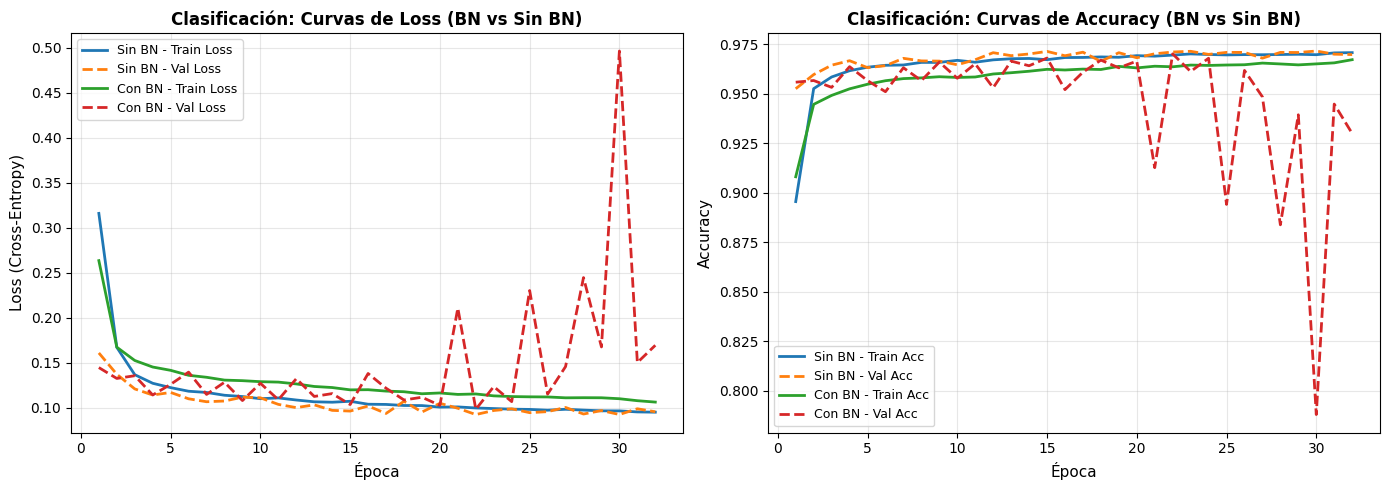


ANÁLISIS Y DECISIÓN PARA BATCH NORMALIZATION
Mejora de Batch Normalization en Val Accuracy: -0.0398

NO INCLUIR Batch Normalization
   - Mejora insuficiente: -0.0398
   - Añade complejidad sin beneficio significativo


In [ ]:
# === EXPERIMENTO 4 ADAPTADO: BATCH NORMALIZATION PARA CLASIFICACIÓN ===

# Se crea un nuevo modelo para Batch Normalization en clasificación
class FFNN_Classifier_BN(nn.Module):

    def __init__(self, d0, d1=64, d2=64, n_classes=3, dropout=0.0):
        super().__init__()

        # Primera capa con BN y Dropout
        self.fc1 = nn.Linear(d0, d1)
        self.bn1 = nn.BatchNorm1d(d1)  # Batch Normalization
        self.dropout1 = nn.Dropout(dropout)

        # Segunda capa con BN y Dropout
        self.fc2 = nn.Linear(d1, d2)
        self.bn2 = nn.BatchNorm1d(d2)  # Batch Normalization
        self.dropout2 = nn.Dropout(dropout)

        # Capa de salida
        self.fc3 = nn.Linear(d2, n_classes) # Output layer for classification

    def forward(self, x):
        # Primera capa con BN y ReLU
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        # Aplicar dropout si la tasa es > 0
        if self.dropout1.p > 0:
            x = self.dropout1(x)

        # Segunda capa con BN y ReLU
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        # Aplicar dropout si la tasa es > 0
        if self.dropout2.p > 0:
            x = self.dropout2(x)

        # Salida (logits)
        x = self.fc3(x)
        return x


# Entrenar modelo CON Batch Normalization

set_seed(42)

model_bn_clf = FFNN_Classifier_BN(
    d0=d_in_classifier,
    d1=d_hidden1_classifier,
    d2=d_hidden2_classifier,
    n_classes=n_classes,
    dropout=0.0
)

# Aplicar inicializacion seleccionada si se decidió usarla
if use_custom_init and selected_init_fn is not None:
    model_bn_clf.apply(selected_init_fn)
    print(f"Inicializacion {selected_init_name} aplicada")

# Entrenar
model_bn_clf, history_bn_clf, best_epoch_bn_clf = fit_classifier(
    model=model_bn_clf,
    train_ds=train_dataset,
    val_ds=val_dataset,
    epochs=100,
    batch_size=64,
    lr=1e-3,
    patience=10,
    weight_decay=0.0,
    compile_model=True
)

# Evaluar
train_metrics_bn_clf = evaluate_classification(model_bn_clf, train_dataset)
val_metrics_bn_clf = evaluate_classification(model_bn_clf, val_dataset)

# Registrar experimento
register_experiment_classifier(
    name="BatchNorm_Classifier",
    description=f"Clasificador con Batch Normalization, WD={selected_wd if use_l2 else 0.0}, Dropout={selected_dropout if use_dropout else 0.0}, Init={selected_init_name if use_custom_init else 'default'}",
    model=model_bn_clf,
    history=history_bn_clf,
    train_metrics=train_metrics_bn_clf,
    val_metrics=val_metrics_bn_clf
)

# Entrenar modelo SIN Batch Normalization para comparacion
print("\n" + "-"*80)
print("Entrenando clasificador SIN Batch Normalization (para comparacion)...")
print("-"*80)

set_seed(42)

model_no_bn_clf = FFNN_Classifier(
    d0=d_in_classifier,
    d1=d_hidden1_classifier,
    d2=d_hidden2_classifier,
    n_classes=n_classes,
    dropout=0.0
)

# Aplicar inicializacion seleccionada si se decidió usarla
if use_custom_init and selected_init_fn is not None:
    model_no_bn_clf.apply(selected_init_fn)
    print(f"Inicializacion {selected_init_name} aplicada")


model_no_bn_clf, history_no_bn_clf, best_epoch_no_bn_clf = fit_classifier(
    model=model_no_bn_clf,
    train_ds=train_dataset,
    val_ds=val_dataset,
    epochs=100,
    batch_size=64,
    lr=1e-3,
    patience=10,
    weight_decay=0.0,
    compile_model=True
)

train_metrics_no_bn_clf = evaluate_classification(model_no_bn_clf, train_dataset)
val_metrics_no_bn_clf = evaluate_classification(model_no_bn_clf, val_dataset)

print(f"{'Method':<25} {'Train Acc':>12} {'Val Acc':>12} {'Val F1':>12} {'Perf Gap':>12} {'Best Epoch':>12}")
print("-"*90)
print(f"{'Without BN':<25} {train_metrics_no_bn_clf['accuracy']:>12.4f} {val_metrics_no_bn_clf['accuracy']:>12.4f} {val_metrics_no_bn_clf['f1_score']:>12.4f} {train_metrics_no_bn_clf['accuracy'] - val_metrics_no_bn_clf['accuracy']:>12.4f} {best_epoch_no_bn_clf:>12}")
print(f"{'With BN':<25} {train_metrics_bn_clf['accuracy']:>12.4f} {val_metrics_bn_clf['accuracy']:>12.4f} {val_metrics_bn_clf['f1_score']:>12.4f} {train_metrics_bn_clf['accuracy'] - val_metrics_bn_clf['accuracy']:>12.4f} {best_epoch_bn_clf:>12}")
print("-"*90)


# Visualizacion de curvas de aprendizaje comparando BN y sin BN
plt.figure(figsize=(14, 5))

# Grafico 1: Curvas de Loss
plt.subplot(1, 2, 1)
plt.plot(history_no_bn_clf['epoch'], history_no_bn_clf['loss'], label='Sin BN - Train Loss', linewidth=2)
if history_no_bn_clf.get('val_loss') and len(history_no_bn_clf['val_loss']) == len(history_no_bn_clf['epoch']):
    plt.plot(history_no_bn_clf['epoch'], history_no_bn_clf['val_loss'], label='Sin BN - Val Loss', linewidth=2, linestyle='--')
plt.plot(history_bn_clf['epoch'], history_bn_clf['loss'], label='Con BN - Train Loss', linewidth=2)
if history_bn_clf.get('val_loss') and len(history_bn_clf['val_loss']) == len(history_bn_clf['epoch']):
    plt.plot(history_bn_clf['epoch'], history_bn_clf['val_loss'], label='Con BN - Val Loss', linewidth=2, linestyle='--')
plt.xlabel('Época', fontsize=11)
plt.ylabel('Loss (Cross-Entropy)', fontsize=11)
plt.title('Clasificación: Curvas de Loss (BN vs Sin BN)', fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Grafico 2: Curvas de Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_bn_clf['epoch'], history_no_bn_clf['accuracy'], label='Sin BN - Train Acc', linewidth=2)
if history_no_bn_clf.get('val_accuracy') and len(history_no_bn_clf['val_accuracy']) == len(history_no_bn_clf['epoch']):
    plt.plot(history_no_bn_clf['epoch'], history_no_bn_clf['val_accuracy'], label='Sin BN - Val Acc', linewidth=2, linestyle='--')
plt.plot(history_bn_clf['epoch'], history_bn_clf['accuracy'], label='Con BN - Train Acc', linewidth=2)
if history_bn_clf.get('val_accuracy') and len(history_bn_clf['val_accuracy']) == len(history_bn_clf['epoch']):
    plt.plot(history_bn_clf['epoch'], history_bn_clf['val_accuracy'], label='Con BN - Val Acc', linewidth=2, linestyle='--')
plt.xlabel('Época', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.title('Clasificación: Curvas de Accuracy (BN vs Sin BN)', fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Decision para Batch Normalization
improvement_bn_clf = val_metrics_bn_clf['accuracy'] - val_metrics_no_bn_clf['accuracy']

print("\n" + "="*80)
print("ANÁLISIS Y DECISIÓN PARA BATCH NORMALIZATION")
print("="*80)
print(f"Mejora de Batch Normalization en Val Accuracy: {improvement_bn_clf:.4f}")

if improvement_bn_clf > 0.001: # Umbral de mejora para considerar BN
    print("\nINCLUIR Batch Normalization en modelo final")
    print("Beneficios observados:")
    if best_epoch_bn_clf and best_epoch_no_bn_clf and best_epoch_bn_clf < best_epoch_no_bn_clf:
        print(f"   - Posible convergencia mas rapida ({best_epoch_bn_clf} vs {best_epoch_no_bn_clf} epocas)")
    print(f"   - Mejor generalizacion (Accuracy aumentado en {improvement_bn_clf:.4f})")
    use_batch_norm = True
    selected_model_class = FFNN_Classifier_BN
else:
    print("\nNO INCLUIR Batch Normalization")
    print(f"   - Mejora insuficiente: {improvement_bn_clf:.4f}")
    print("   - Añade complejidad sin beneficio significativo")
    use_batch_norm = False
    selected_model_class = FFNN_Classifier

---

# EXPERIMENTO 5: Bootstrap

## ¿Qué es Bootstrap?

Creamos N muestras bootstrap, evaluamos cada modelo y calculamos:
   - Media de las métricas (accuracy, F1, etc.)
   - Desviación estándar (mide la incertidumbre)
   - Intervalo de confianza (rango probable de la métrica)
   
## Implementación

Entrenaremos `n_bootstrap=5` modelos (puedes aumentar para mejor estimación)
usando la mejor configuración encontrada en experimentos anteriores.


EXPERIMENTO 5: BOOTSTRAP PARA CLASIFICACIÓN

 Entrenando 5 modelos con muestras bootstrap...

  Configuración seleccionada:
   - Weight Decay (L2): 0.0
   - Dropout: 0.2
   - Batch Normalization: No
   - Inicialización: default
--------------------------------------------------------------------------------

🔸 Bootstrap 1/5
----------------------------------------
[005] loss=0.1332 accuracy=0.9599 | val_loss=0.1063 val_accuracy=0.9676
[010] loss=0.1156 accuracy=0.9651 | val_loss=0.0977 val_accuracy=0.9699
[015] loss=0.1080 accuracy=0.9670 | val_loss=0.0988 val_accuracy=0.9696
[020] loss=0.1069 accuracy=0.9674 | val_loss=0.0934 val_accuracy=0.9711
[025] loss=0.1051 accuracy=0.9683 | val_loss=0.0955 val_accuracy=0.9711
[030] loss=0.1022 accuracy=0.9685 | val_loss=0.0978 val_accuracy=0.9708
[035] loss=0.1009 accuracy=0.9697 | val_loss=0.0932 val_accuracy=0.9722
[040] loss=0.0994 accuracy=0.9694 | val_loss=0.0945 val_accuracy=0.9715
[045] loss=0.0978 accuracy=0.9703 | val_loss=0.0926 val_

/tmp/ipython-input-1063179318.py:159: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, labels=labels, patch_artist=True)


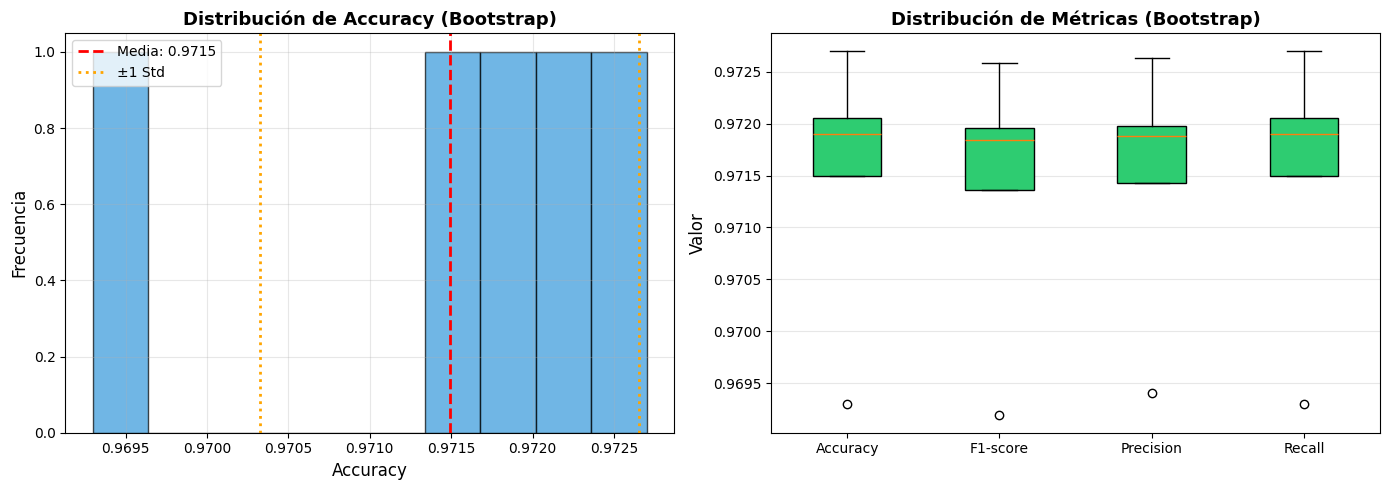


✓ Experimento 5 (Bootstrap) completado


In [ ]:
# === EXPERIMENTO 5: BOOTSTRAP PARA CLASIFICACIÓN ===

from sklearn.utils import resample

print("\n" + "="*80)
print("EXPERIMENTO 5: BOOTSTRAP PARA CLASIFICACIÓN")
print("="*80)

# Configuración del bootstrap
n_bootstrap = 5  # Número de muestras bootstrap (aumentar para mejor estimación)
bootstrap_results = []

print(f"\n Entrenando {n_bootstrap} modelos con muestras bootstrap...")
print("\n  Configuración seleccionada:")
print(f"   - Weight Decay (L2): {selected_wd if use_l2 else 0.0}")
print(f"   - Dropout: {selected_dropout if use_dropout else 0.0}")
print(f"   - Batch Normalization: {'Sí' if use_batch_norm else 'No'}")
print(f"   - Inicialización: {selected_init_name if use_custom_init else 'default'}")
print("-"*80)

# Obtener datos de entrenamiento como arrays numpy
X_train_np = train_dataset.tensors[0].numpy()
y_train_np = train_dataset.tensors[1].numpy()

# Entrenar múltiples modelos con muestras bootstrap
for i in range(n_bootstrap):
    print(f"\n🔸 Bootstrap {i+1}/{n_bootstrap}")
    print("-"*40)

    # Establecer semilla diferente para cada bootstrap
    set_seed(42 + i)

    # Crear muestra bootstrap (remuestreo con reemplazo)
    X_boot, y_boot = resample(X_train_np, y_train_np,
                               n_samples=len(X_train_np),
                               random_state=42+i,
                               stratify=y_train_np)  # Mantener proporción de clases

    # Convertir a tensores y crear dataset
    boot_dataset = TensorDataset(
        torch.tensor(X_boot, dtype=torch.float32),
        torch.tensor(y_boot, dtype=torch.long)
    )

    # Crear modelo con la mejor configuración encontrada
    if use_batch_norm:
        model_boot = FFNN_Classifier_BN(
            d0=d_in_classifier,
            d1=d_hidden1_classifier,
            d2=d_hidden2_classifier,
            n_classes=n_classes,
            dropout=selected_dropout if use_dropout else 0.0
        )
    else:
        model_boot = FFNN_Classifier(
            d0=d_in_classifier,
            d1=d_hidden1_classifier,
            d2=d_hidden2_classifier,
            n_classes=n_classes,
            dropout=selected_dropout if use_dropout else 0.0
        )

    # Aplicar inicialización seleccionada
    if use_custom_init and selected_init_fn is not None:
        model_boot.apply(selected_init_fn)

    # Entrenar modelo
    model_boot, history_boot, best_epoch_boot = fit_classifier(
        model=model_boot,
        train_ds=boot_dataset,
        val_ds=val_dataset,
        epochs=100,
        batch_size=64,
        lr=1e-3,
        patience=10,
        weight_decay=selected_wd if use_l2 else 0.0,
        compile_model=False
    )

    # Evaluar modelo
    train_metrics_boot = evaluate_classification(model_boot, boot_dataset)
    val_metrics_boot = evaluate_classification(model_boot, val_dataset)

    # Guardar resultados
    bootstrap_results.append({
        'iteration': i+1,
        'model': model_boot,
        'history': history_boot,
        'best_epoch': best_epoch_boot,
        'train_metrics': train_metrics_boot,
        'val_metrics': val_metrics_boot
    })

    print(f"   ✓ Val Accuracy: {val_metrics_boot['accuracy']:.4f}")
    print(f"   ✓ Val F1-score: {val_metrics_boot['f1_score']:.4f}")


# Extraer métricas de validación
val_accuracies = [r['val_metrics']['accuracy'] for r in bootstrap_results]
val_f1_scores = [r['val_metrics']['f1_score'] for r in bootstrap_results]
val_precisions = [r['val_metrics']['precision'] for r in bootstrap_results]
val_recalls = [r['val_metrics']['recall'] for r in bootstrap_results]

# Calcular estadísticas
print("\n📊 Estadísticas de Bootstrap (Validación):")
print("-"*80)
print(f"{'Métrica':<20} {'Media':>10} {'Std Dev':>10} {'Min':>10} {'Max':>10} {'IC 95%':>20}")
print("-"*80)

def print_bootstrap_stats(name, values):
    mean = np.mean(values)
    std = np.std(values)
    min_val = np.min(values)
    max_val = np.max(values)
    # Intervalo de confianza 95% (aproximado)
    ci_lower = np.percentile(values, 2.5)
    ci_upper = np.percentile(values, 97.5)
    print(f"{name:<20} {mean:>10.4f} {std:>10.4f} {min_val:>10.4f} {max_val:>10.4f} [{ci_lower:.4f}, {ci_upper:.4f}]")

print_bootstrap_stats('Accuracy', val_accuracies)
print_bootstrap_stats('F1-score', val_f1_scores)
print_bootstrap_stats('Precision', val_precisions)
print_bootstrap_stats('Recall', val_recalls)
print("-"*80)

# Interpretar resultados
mean_acc = np.mean(val_accuracies)
std_acc = np.std(val_accuracies)

print("\n Interpretación:")
print(f"   - Accuracy esperado: {mean_acc:.4f} ± {std_acc:.4f}")

if std_acc < 0.01:
    print("   -  Modelo muy estable (baja variabilidad)")
elif std_acc < 0.02:
    print("   -  Modelo estable (variabilidad aceptable)")
else:
    print("   -   Modelo con alta variabilidad (considerar más datos o regularización)")

# Visualización
plt.figure(figsize=(14, 5))

# Gráfico 1: Distribución de Accuracy
plt.subplot(1, 2, 1)
plt.hist(val_accuracies, bins=10, edgecolor='black', alpha=0.7, color='#3498db')
plt.axvline(mean_acc, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_acc:.4f}')
plt.axvline(mean_acc - std_acc, color='orange', linestyle=':', linewidth=2, label=f'±1 Std')
plt.axvline(mean_acc + std_acc, color='orange', linestyle=':', linewidth=2)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Accuracy (Bootstrap)', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Boxplot de métricas
plt.subplot(1, 2, 2)
data_to_plot = [val_accuracies, val_f1_scores, val_precisions, val_recalls]
labels = ['Accuracy', 'F1-score', 'Precision', 'Recall']
bp = plt.boxplot(data_to_plot, labels=labels, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('#2ecc71')
plt.ylabel('Valor', fontsize=12)
plt.title('Distribución de Métricas (Bootstrap)', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Experimento 5 (Bootstrap) completado")
print("="*80)

---

# EXPERIMENTO 6: Ensemble (Ensamblado de Modelos)

Ensemble Learning es una técnica que combina las predicciones de múltiples modelos para obtener un resultado mejor que el de cualquier modelo individual.

Voy a combinar **4 modelos diferentes**:

### 1. Modelo Baseline (Sin regularización)
- **Sin** weight decay
- **Sin** dropout
- **Sin** batch normalization
- Inicialización default

In [ ]:
# === EXPERIMENTO 6: ENSEMBLE DE MODELOS PARA CLASIFICACIÓN ===

print("\n Objetivo: Combinar múltiples modelos para mejorar las predicciones")
print("\n Modelos que formarán parte del ensemble:")
print("   1. Baseline (sin regularización)")
print("   2. L2 (con weight decay óptimo)")
print("   3. Dropout (con dropout óptimo)")
print("   4. Completo (L2 + Dropout + BN + Inicialización)")
print("\n Entrenando modelos del ensemble...\n")

ensemble_models = []
ensemble_configs = []

# --- MODELO 1: BASELINE ---

set_seed(42)
model_ensemble_1 = FFNN_Classifier(
    d0=d_in_classifier,
    d1=d_hidden1_classifier,
    d2=d_hidden2_classifier,
    n_classes=n_classes,
    dropout=0.0
)

model_ensemble_1, hist_e1, best_e1 = fit_classifier(
    model=model_ensemble_1,
    train_ds=train_dataset,
    val_ds=val_dataset,
    epochs=100,
    batch_size=64,
    lr=1e-3,
    patience=10,
    weight_decay=0.0,
    compile_model=True
)

metrics_e1 = evaluate_classification(model_ensemble_1, val_dataset)
ensemble_models.append(model_ensemble_1)
ensemble_configs.append('Baseline')


# --- MODELO 2: L2 ---

set_seed(43)
model_ensemble_2 = FFNN_Classifier(
    d0=d_in_classifier,
    d1=d_hidden1_classifier,
    d2=d_hidden2_classifier,
    n_classes=n_classes,
    dropout=0.0
)

model_ensemble_2, hist_e2, best_e2 = fit_classifier(
    model=model_ensemble_2,
    train_ds=train_dataset,
    val_ds=val_dataset,
    epochs=100,
    batch_size=64,
    lr=1e-3,
    patience=10,
    weight_decay=selected_wd if use_l2 else 1e-4,  # Usar WD seleccionado o default
    compile_model=False
)

metrics_e2 = evaluate_classification(model_ensemble_2, val_dataset)
ensemble_models.append(model_ensemble_2)
ensemble_configs.append('L2')


# --- MODELO 3: DROPOUT ---

set_seed(44)
model_ensemble_3 = FFNN_Classifier(
    d0=d_in_classifier,
    d1=d_hidden1_classifier,
    d2=d_hidden2_classifier,
    n_classes=n_classes,
    dropout=selected_dropout if use_dropout else 0.2  # Usar dropout seleccionado o default
)

model_ensemble_3, hist_e3, best_e3 = fit_classifier(
    model=model_ensemble_3,
    train_ds=train_dataset,
    val_ds=val_dataset,
    epochs=100,
    batch_size=64,
    lr=1e-3,
    patience=10,
    weight_decay=0.0,
    compile_model=True
)

metrics_e3 = evaluate_classification(model_ensemble_3, val_dataset)
ensemble_models.append(model_ensemble_3)
ensemble_configs.append('Dropout')


# --- MODELO 4: COMPLETO ---
set_seed(45)

if use_batch_norm:
    model_ensemble_4 = FFNN_Classifier_BN(
        d0=d_in_classifier,
        d1=d_hidden1_classifier,
        d2=d_hidden2_classifier,
        n_classes=n_classes,
        dropout=0.0
    )
else:
    model_ensemble_4 = FFNN_Classifier(
        d0=d_in_classifier,
        d1=d_hidden1_classifier,
        d2=d_hidden2_classifier,
        n_classes=n_classes,
        dropout=0.0
    )

# Aplicar mejor inicialización
if use_custom_init and selected_init_fn is not None:
    model_ensemble_4.apply(selected_init_fn)
else:
    model_ensemble_4.apply(init_weights_he)

model_ensemble_4, hist_e4, best_e4 = fit_classifier(
    model=model_ensemble_4,
    train_ds=train_dataset,
    val_ds=val_dataset,
    epochs=100,
    batch_size=64,
    lr=1e-3,
    patience=10,
    weight_decay=selected_wd if use_l2 else 1e-4,
    compile_model=True
)

metrics_e4 = evaluate_classification(model_ensemble_4, val_dataset)
ensemble_models.append(model_ensemble_4)
ensemble_configs.append('Completo')


@torch.no_grad()
def ensemble_predict(models, dataset, method='soft'):
    """
    Realiza predicciones usando ensemble de modelos.

    Args:
        models: Lista de modelos entrenados
        dataset: Dataset para hacer predicciones
        method: 'soft' (promedio de probabilidades) o 'hard' (votación)

    Returns:
        Predicciones del ensemble, probabilidades promedio
    """
    loader = DataLoader(dataset, batch_size=256)
    all_probs = []
    all_y_true = []

    for xb, yb in loader:
        xb = xb.to(DEVICE)
        batch_probs = []

        # Obtener probabilidades de cada modelo
        for model in models:
            model.eval()
            logits = model(xb)
            probs = F.softmax(logits, dim=1)
            batch_probs.append(probs.cpu().numpy())

        if method == 'soft':
            # Soft voting: promedio de probabilidades
            avg_probs = np.mean(batch_probs, axis=0)
        else:
            # Hard voting: votación por mayoría
            votes = np.array([np.argmax(p, axis=1) for p in batch_probs])
            avg_probs = np.apply_along_axis(
                lambda x: np.bincount(x, minlength=n_classes),
                axis=0, arr=votes
            ).T / len(models)

        all_probs.append(avg_probs)
        all_y_true.append(yb.cpu().numpy())

    # Concatenar resultados
    all_probs = np.concatenate(all_probs)
    all_y_true = np.concatenate(all_y_true)
    predictions = np.argmax(all_probs, axis=1)

    return predictions, all_probs, all_y_true


# Evaluar ensemble en validación
ensemble_preds, ensemble_probs, y_true = ensemble_predict(ensemble_models, val_dataset, method='soft')

# Calcular métricas del ensemble
ensemble_accuracy = accuracy_score(y_true, ensemble_preds)
ensemble_f1 = f1_score(y_true, ensemble_preds, average='weighted')
ensemble_precision = precision_score(y_true, ensemble_preds, average='weighted')
ensemble_recall = recall_score(y_true, ensemble_preds, average='weighted')

# Calcular mejora
best_individual = max(metrics_e1['accuracy'], metrics_e2['accuracy'],
                      metrics_e3['accuracy'], metrics_e4['accuracy'])
improvement = ensemble_accuracy - best_individual

if improvement > 0.005:
    print("\n El ensemble mejora significativamente sobre modelos individuales")
elif improvement > 0:
    print("\n El ensemble mejora ligeramente sobre modelos individuales")
else:
    print("\n  El ensemble no mejora sobre el mejor modelo individual")
    print("   Esto puede deberse a falta de diversidad entre modelos")

print("\n Experimento 6 (Ensemble) completado")
print("="*80)


 Objetivo: Combinar múltiples modelos para mejorar las predicciones

 Modelos que formarán parte del ensemble:
   1. Baseline (sin regularización)
   2. L2 (con weight decay óptimo)
   3. Dropout (con dropout óptimo)
   4. Completo (L2 + Dropout + BN + Inicialización)

 Entrenando modelos del ensemble...

Modelo compilado con torch.compile para mejor rendimiento
[005] loss=0.1226 accuracy=0.9634 | val_loss=0.1172 val_accuracy=0.9632
[010] loss=0.1103 accuracy=0.9669 | val_loss=0.1112 val_accuracy=0.9647
[015] loss=0.1074 accuracy=0.9672 | val_loss=0.0965 val_accuracy=0.9714
[020] loss=0.1009 accuracy=0.9692 | val_loss=0.1051 val_accuracy=0.9682
[025] loss=0.0983 accuracy=0.9696 | val_loss=0.0947 val_accuracy=0.9709
[030] loss=0.0967 accuracy=0.9697 | val_loss=0.0927 val_accuracy=0.9716
 Early stopping en época 32 (mejor época: 22)
 Modelo restaurado a época 22 (mejor val_loss: 0.0926)
[005] loss=0.1214 accuracy=0.9629 | val_loss=0.1183 val_accuracy=0.9617
[010] loss=0.1101 accuracy=0.

---
## EXPERIMENTOS CON DATOS BALANCEADOS

En esta sección ejecutaremos TODOS los experimentos del trabajo original usando los datos balanceados.

**Experimentos a ejecutar:**

1. **Experimento 1: Regularización L2** - Probar 4 valores de weight_decay
2. **Experimento 2: Dropout** - Probar 4 valores de dropout
3. **Experimento 3: Inicializaciones de Pesos** - Probar 3 estrategias (default, Xavier, He)
4. **Experimento 4: Batch Normalization** - Evaluar impacto de BatchNorm
5. **Experimento 5: Bootstrap** - Entrenar 5 modelos con remuestreo
6. **Experimento 6: Ensemble** - Combinar modelos mediante votación

El código está simplificado usando funciones reutilizables para facilitar mantenimiento.

In [ ]:
# === FUNCIONES AUXILIARES Y ARQUITECTURA DEL MODELO ===

def set_seed(seed=42):
    """Establece la semilla aleatoria para reproducibilidad"""
    import random
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

def make_mlp(d_in: int, d_hidden=(64, 64), d_out=3, dropout=0.0, act=nn.ReLU):
    """Construye una red neuronal MLP"""
    layers = []
    d_prev = d_in
    
    for h in d_hidden:
        layers += [nn.Linear(d_prev, h), act()]
        if dropout > 0:
            layers += [nn.Dropout(dropout)]
        d_prev = h
    
    layers += [nn.Linear(d_prev, d_out)]
    return nn.Sequential(*layers)

def init_weights_xavier(m):
    """Inicialización Xavier/Glorot"""
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

def init_weights_he(m):
    """Inicialización He/Kaiming"""
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# === ARQUITECTURA DEL MODELO ===
class FFNN_Classifier(nn.Module):
    """Red neuronal feed-forward para clasificación multi-clase"""
    def __init__(self, d0, d_hidden=(64, 64), n_classes=3, dropout=0.0, use_batch_norm=False):
        super().__init__()
        
        self.use_batch_norm = use_batch_norm
        self.layers = nn.ModuleList()
        self.batch_norms = nn.ModuleList()
        
        d_prev = d0
        for h in d_hidden:
            self.layers.append(nn.Linear(d_prev, h))
            if use_batch_norm:
                self.batch_norms.append(nn.BatchNorm1d(h))
            d_prev = h
        
        self.output_layer = nn.Linear(d_prev, n_classes)
        self.dropout = nn.Dropout(dropout) if dropout > 0 else None
    
    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if self.use_batch_norm:
                x = self.batch_norms[i](x)
            x = F.relu(x)
            if self.dropout is not None:
                x = self.dropout(x)
        x = self.output_layer(x)
        return x

# Configuración global
set_seed(42)
d_in_classifier = train_dataset.tensors[0].shape[1]
n_classes = 3

print(f'Input features: {d_in_classifier}')
print(f'Output classes: {n_classes}')
print('Funciones y modelo implementados')

In [ ]:
# === FUNCIONES DE ENTRENAMIENTO Y EVALUACIÓN ===

def fit_classifier(model, train_ds, val_ds, epochs=100, batch_size=64, lr=1e-3,
                   patience=10, min_delta=1e-4, weight_decay=0.0, device=DEVICE):
    """Entrena un modelo de clasificación con early stopping"""
    
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
    
    best_val_loss = math.inf
    best_epoch = 0
    epochs_without_improvement = 0
    best_model_state = None
    
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * X_batch.size(0)
            _, predicted = outputs.max(1)
            train_correct += predicted.eq(y_batch).sum().item()
            train_total += y_batch.size(0)
        
        train_loss = train_loss / train_total
        train_acc = train_correct / train_total
        
        # Validation
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                
                val_loss += loss.item() * X_batch.size(0)
                _, predicted = outputs.max(1)
                val_correct += predicted.eq(y_batch).sum().item()
                val_total += y_batch.size(0)
        
        val_loss = val_loss / val_total
        val_acc = val_correct / val_total
        
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        # Early stopping
        if val_loss < best_val_loss - min_delta:
            best_val_loss = val_loss
            best_epoch = epoch + 1
            epochs_without_improvement = 0
            best_model_state = model.state_dict().copy()
        else:
            epochs_without_improvement += 1
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoca [{epoch+1:3d}/{epochs}] | '
                  f'Train Loss: {train_loss:.4f}, Acc: {train_acc*100:.2f}% | '
                  f'Val Loss: {val_loss:.4f}, Acc: {val_acc*100:.2f}%')
        
        if epochs_without_improvement >= patience:
            print(f'Early stopping - Mejor epoca: {best_epoch}')
            break
    
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return history, best_epoch

@torch.no_grad()
def evaluate_classification(model, data_loader, device=DEVICE):
    """Evalúa un modelo de clasificación"""
    model.eval()
    model.to(device)
    
    all_predictions = []
    all_labels = []
    
    for X_batch, y_batch in data_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, predictions = outputs.max(1)
        
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(y_batch.numpy())
    
    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)
    
    return {
        'accuracy': accuracy_score(all_labels, all_predictions),
        'f1_score': f1_score(all_labels, all_predictions, average='weighted'),
        'precision': precision_score(all_labels, all_predictions, average='weighted'),
        'recall': recall_score(all_labels, all_predictions, average='weighted'),
        'confusion_matrix': confusion_matrix(all_labels, all_predictions),
        'classification_report': classification_report(all_labels, all_predictions, 
                                                      target_names=label_encoder.classes_)
    }

# Registry para almacenar resultados
results_registry = {}

def register_experiment_classifier(name, model, test_loader):
    """Registra los resultados de un experimento"""
    metrics = evaluate_classification(model, test_loader)
    results_registry[name] = metrics
    print(f'\n{name}:')
    print(f'  Accuracy: {metrics["accuracy"]*100:.2f}%')
    print(f'  F1-Score: {metrics["f1_score"]:.4f}')
    print(f'  Precision: {metrics["precision"]:.4f}')
    print(f'  Recall: {metrics["recall"]:.4f}')
    return metrics

def compare_experiments_classifier():
    """Compara todos los experimentos registrados"""
    print('\n' + '='*80)
    print('COMPARACIÓN DE EXPERIMENTOS')
    print('='*80)
    print(f'{"Experimento":<30} {"Accuracy":>12} {"F1-Score":>12} {"Precision":>12} {"Recall":>12}')
    print('-'*80)
    
    for name, metrics in results_registry.items():
        print(f'{name:<30} {metrics["accuracy"]*100:>11.2f}%  {metrics["f1_score"]:>11.4f}  '
              f'{metrics["precision"]:>11.4f}  {metrics["recall"]:>11.4f}')
    
    print('='*80)
    best_exp = max(results_registry.items(), key=lambda x: x[1]['accuracy'])
    print(f'\nMejor experimento: {best_exp[0]} (Accuracy: {best_exp[1]["accuracy"]*100:.2f}%)')

print('Funciones de entrenamiento y evaluación implementadas')

In [ ]:
# === CONFIGURACIÓN GENERAL ===

BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 1e-3
PATIENCE = 15
HIDDEN_LAYERS = (128, 64)

# DataLoaders
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ============================================================================
# EXPERIMENTO 1: REGULARIZACIÓN L2 (Weight Decay)
# ============================================================================

print('\n' + '='*80)
print('EXPERIMENTO 1: REGULARIZACIÓN L2')
print('='*80)
print('Objetivo: Evaluar impacto de diferentes valores de weight_decay')
print('Valores a probar: [1e-5, 1e-4, 1e-3, 1e-2]')

l2_results = {}
weight_decay_values = [1e-5, 1e-4, 1e-3, 1e-2]

for idx, wd in enumerate(weight_decay_values):
    print(f'\n{"-"*80}')
    print(f'L2 Regularization - weight_decay={wd:.0e}')
    print(f'{"-"*80}')
    
    set_seed(42 + idx)
    model = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=0.0, use_batch_norm=False)
    model.apply(init_weights_xavier)
    
    history, best_epoch = fit_classifier(
        model, train_dataset, val_dataset,
        epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
        patience=PATIENCE, weight_decay=wd
    )
    
    metrics = register_experiment_classifier(f'L2_wd_{wd:.0e}', model, test_loader)
    l2_results[wd] = {'model': model, 'metrics': metrics, 'history': history}

print(f'\nExperimento 1 completado - {len(l2_results)} modelos entrenados')

# ============================================================================
# EXPERIMENTO 2: DROPOUT
# ============================================================================

print('\n\n' + '='*80)
print('EXPERIMENTO 2: DROPOUT')
print('='*80)
print('Objetivo: Evaluar impacto de diferentes valores de dropout')
print('Valores a probar: [0.1, 0.2, 0.3, 0.5]')

dropout_results = {}
dropout_values = [0.1, 0.2, 0.3, 0.5]

for idx, drop in enumerate(dropout_values):
    print(f'\n{"-"*80}')
    print(f'Dropout - dropout={drop}')
    print(f'{"-"*80}')
    
    set_seed(50 + idx)
    model = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=drop, use_batch_norm=False)
    model.apply(init_weights_he)
    
    history, best_epoch = fit_classifier(
        model, train_dataset, val_dataset,
        epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
        patience=PATIENCE, weight_decay=0.0
    )
    
    metrics = register_experiment_classifier(f'Dropout_{drop}', model, test_loader)
    dropout_results[drop] = {'model': model, 'metrics': metrics, 'history': history}

print(f'\nExperimento 2 completado - {len(dropout_results)} modelos entrenados')

# ============================================================================
# EXPERIMENTO 3: INICIALIZACIONES DE PESOS
# ============================================================================

print('\n\n' + '='*80)
print('EXPERIMENTO 3: INICIALIZACIONES DE PESOS')
print('='*80)
print('Objetivo: Comparar estrategias de inicialización de pesos')
print('Estrategias a probar: [default, Xavier, He]')

init_results = {}
initializations = {
    'default': None,
    'xavier': init_weights_xavier,
    'he': init_weights_he
}

for idx, (init_name, init_func) in enumerate(initializations.items()):
    print(f'\n{"-"*80}')
    print(f'Inicialización - {init_name}')
    print(f'{"-"*80}')
    
    set_seed(60 + idx)
    model = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=0.0, use_batch_norm=False)
    
    if init_func is not None:
        model.apply(init_func)
    
    history, best_epoch = fit_classifier(
        model, train_dataset, val_dataset,
        epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
        patience=PATIENCE, weight_decay=0.0
    )
    
    metrics = register_experiment_classifier(f'Init_{init_name}', model, test_loader)
    init_results[init_name] = {'model': model, 'metrics': metrics, 'history': history}

print(f'\nExperimento 3 completado - {len(init_results)} modelos entrenados')

# ============================================================================
# EXPERIMENTO 4: BATCH NORMALIZATION
# ============================================================================

print('\n\n' + '='*80)
print('EXPERIMENTO 4: BATCH NORMALIZATION')
print('='*80)
print('Objetivo: Evaluar impacto de Batch Normalization')

set_seed(70)
model_bn = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=0.2, use_batch_norm=True)
model_bn.apply(init_weights_he)

history_bn, best_epoch_bn = fit_classifier(
    model_bn, train_dataset, val_dataset,
    epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
    patience=PATIENCE, weight_decay=0.0
)

metrics_bn = register_experiment_classifier('Batch_Normalization', model_bn, test_loader)

print('\nExperimento 4 completado - 1 modelo entrenado')

print(f'\n\n{"="*80}')
print(f'EXPERIMENTOS 1-4 COMPLETADOS')
print(f'{"="*80}')
print(f'Total de modelos entrenados: {len(l2_results) + len(dropout_results) + len(init_results) + 1}')

In [ ]:
# ============================================================================
# EXPERIMENTO 5: BOOTSTRAP
# ============================================================================

print('\n\n' + '='*80)
print('EXPERIMENTO 5: BOOTSTRAP')
print('='*80)
print('Objetivo: Entrenar modelos con remuestreo bootstrap para estimar variabilidad')
print('Número de modelos bootstrap: 5')

def create_bootstrap_sample(dataset, seed=None):
    """Crea una muestra bootstrap de un TensorDataset"""
    if seed is not None:
        np.random.seed(seed)
    
    n_samples = len(dataset)
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    
    X_bootstrap = dataset.tensors[0][indices]
    y_bootstrap = dataset.tensors[1][indices]
    
    return TensorDataset(X_bootstrap, y_bootstrap)

bootstrap_results = {}
n_bootstrap = 5

for i in range(n_bootstrap):
    print(f'\n{"-"*80}')
    print(f'Bootstrap modelo {i+1}/{n_bootstrap}')
    print(f'{"-"*80}')
    
    # Crear muestra bootstrap
    set_seed(80 + i)
    bootstrap_dataset = create_bootstrap_sample(train_dataset, seed=80 + i)
    
    # Entrenar modelo
    model = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=0.25, use_batch_norm=False)
    model.apply(init_weights_xavier)
    
    history, best_epoch = fit_classifier(
        model, bootstrap_dataset, val_dataset,
        epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
        patience=PATIENCE, weight_decay=0.0
    )
    
    metrics = register_experiment_classifier(f'Bootstrap_{i+1}', model, test_loader)
    bootstrap_results[i+1] = {'model': model, 'metrics': metrics, 'history': history}

print(f'\nExperimento 5 completado - {len(bootstrap_results)} modelos entrenados')

# Calcular estadísticas del bootstrap
bootstrap_accuracies = [bootstrap_results[i]['metrics']['accuracy'] for i in range(1, n_bootstrap+1)]
bootstrap_f1_scores = [bootstrap_results[i]['metrics']['f1_score'] for i in range(1, n_bootstrap+1)]

print(f'\n{"="*60}')
print('ESTADÍSTICAS DEL BOOTSTRAP')
print(f'{"="*60}')
print(f'Accuracy - Media: {np.mean(bootstrap_accuracies)*100:.2f}% ± {np.std(bootstrap_accuracies)*100:.2f}%')
print(f'F1-Score - Media: {np.mean(bootstrap_f1_scores):.4f} ± {np.std(bootstrap_f1_scores):.4f}')

# ============================================================================
# EXPERIMENTO 6: ENSEMBLE (ENSAMBLADO DE MODELOS)
# ============================================================================

print('\n\n' + '='*80)
print('EXPERIMENTO 6: ENSEMBLE')
print('='*80)
print('Objetivo: Combinar predicciones de múltiples modelos mediante votación')
print('Modelos a combinar: Baseline, Mejor L2, Mejor Dropout, Batch Normalization')

# Seleccionar modelos para el ensemble
# 1. Baseline (sin regularización)
set_seed(90)
model_baseline = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=0.0, use_batch_norm=False)
model_baseline.apply(init_weights_xavier)
print(f'\n{"-"*80}')
print('Entrenando modelo 1: Baseline')
print(f'{"-"*80}')
history_baseline, _ = fit_classifier(
    model_baseline, train_dataset, val_dataset,
    epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
    patience=PATIENCE, weight_decay=0.0
)

# 2. Mejor L2 (usar weight_decay que tuvo mejor resultado)
best_l2_wd = max(l2_results.items(), key=lambda x: x[1]['metrics']['accuracy'])[0]
set_seed(91)
model_l2_best = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=0.0, use_batch_norm=False)
model_l2_best.apply(init_weights_xavier)
print(f'\n{"-"*80}')
print(f'Entrenando modelo 2: L2 (weight_decay={best_l2_wd:.0e})')
print(f'{"-"*80}')
history_l2_best, _ = fit_classifier(
    model_l2_best, train_dataset, val_dataset,
    epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
    patience=PATIENCE, weight_decay=best_l2_wd
)

# 3. Mejor Dropout
best_dropout = max(dropout_results.items(), key=lambda x: x[1]['metrics']['accuracy'])[0]
set_seed(92)
model_dropout_best = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=best_dropout, use_batch_norm=False)
model_dropout_best.apply(init_weights_he)
print(f'\n{"-"*80}')
print(f'Entrenando modelo 3: Dropout (dropout={best_dropout})')
print(f'{"-"*80}')
history_dropout_best, _ = fit_classifier(
    model_dropout_best, train_dataset, val_dataset,
    epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
    patience=PATIENCE, weight_decay=0.0
)

# 4. Batch Normalization (ya entrenado en experimento 4)
model_bn_ensemble = model_bn

# Crear lista de modelos del ensemble
ensemble_models = [model_baseline, model_l2_best, model_dropout_best, model_bn_ensemble]

# Función de predicción por votación mayoritaria
@torch.no_grad()
def ensemble_predict(models, data_loader, device=DEVICE):
    """Predicción por votación mayoritaria"""
    all_predictions = []
    all_labels = []
    
    # Obtener predicciones de cada modelo
    models_predictions = []
    for model in models:
        model.eval()
        model.to(device)
        preds = []
        
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            _, predicted = outputs.max(1)
            preds.extend(predicted.cpu().numpy())
        
        models_predictions.append(np.array(preds))
    
    # Votación mayoritaria
    models_predictions = np.array(models_predictions)  # shape: (n_models, n_samples)
    
    # Para cada muestra, obtener la clase más votada
    from scipy import stats
    ensemble_preds = stats.mode(models_predictions, axis=0, keepdims=False)[0]
    
    # Obtener labels reales
    for _, y_batch in data_loader:
        all_labels.extend(y_batch.numpy())
    
    all_labels = np.array(all_labels)
    
    return {
        'accuracy': accuracy_score(all_labels, ensemble_preds),
        'f1_score': f1_score(all_labels, ensemble_preds, average='weighted'),
        'precision': precision_score(all_labels, ensemble_preds, average='weighted'),
        'recall': recall_score(all_labels, ensemble_preds, average='weighted'),
        'confusion_matrix': confusion_matrix(all_labels, ensemble_preds),
        'classification_report': classification_report(all_labels, ensemble_preds, 
                                                      target_names=label_encoder.classes_)
    }

# Evaluar ensemble
print(f'\n{"-"*80}')
print('Evaluando Ensemble (Votación Mayoritaria)')
print(f'{"-"*80}')
ensemble_metrics = ensemble_predict(ensemble_models, test_loader)
results_registry['Ensemble_Voting'] = ensemble_metrics

print(f'\nEnsemble_Voting:')
print(f'  Accuracy: {ensemble_metrics["accuracy"]*100:.2f}%')
print(f'  F1-Score: {ensemble_metrics["f1_score"]:.4f}')
print(f'  Precision: {ensemble_metrics["precision"]:.4f}')
print(f'  Recall: {ensemble_metrics["recall"]:.4f}')

print(f'\nExperimento 6 completado - Ensemble con {len(ensemble_models)} modelos')

print(f'\n\n{"="*80}')
print(f'TODOS LOS EXPERIMENTOS COMPLETADOS')
print(f'{"="*80}')
total_models = (len(l2_results) + len(dropout_results) + len(init_results) + 
                1 + len(bootstrap_results) + len(ensemble_models))
print(f'Total de modelos entrenados: {total_models}')

In [ ]:
# === COMPARACIÓN COMPLETA DE TODOS LOS EXPERIMENTOS ===

# Mostrar tabla comparativa de TODOS los experimentos
compare_experiments_classifier()

# ============================================================================
# VISUALIZACIÓN: COMPARACIÓN POR EXPERIMENTO
# ============================================================================

print(f'\n{"="*80}')
print('ANÁLISIS POR EXPERIMENTO')
print(f'{"="*80}')

# Experimento 1: L2
print(f'\nEXPERIMENTO 1 - L2 REGULARIZATION:')
print(f'{"Weight Decay":<15} {"Accuracy":>12} {"F1-Score":>12}')
print('-'*40)
for wd in weight_decay_values:
    acc = l2_results[wd]['metrics']['accuracy']
    f1 = l2_results[wd]['metrics']['f1_score']
    print(f'{wd:<15.0e} {acc*100:>11.2f}%  {f1:>11.4f}')
best_l2 = max(l2_results.items(), key=lambda x: x[1]['metrics']['accuracy'])
print(f'Mejor: weight_decay={best_l2[0]:.0e} (Accuracy: {best_l2[1]["metrics"]["accuracy"]*100:.2f}%)')

# Experimento 2: Dropout
print(f'\nEXPERIMENTO 2 - DROPOUT:')
print(f'{"Dropout":<15} {"Accuracy":>12} {"F1-Score":>12}')
print('-'*40)
for drop in dropout_values:
    acc = dropout_results[drop]['metrics']['accuracy']
    f1 = dropout_results[drop]['metrics']['f1_score']
    print(f'{drop:<15.1f} {acc*100:>11.2f}%  {f1:>11.4f}')
best_dropout_exp = max(dropout_results.items(), key=lambda x: x[1]['metrics']['accuracy'])
print(f'Mejor: dropout={best_dropout_exp[0]} (Accuracy: {best_dropout_exp[1]["metrics"]["accuracy"]*100:.2f}%)')

# Experimento 3: Inicializaciones
print(f'\nEXPERIMENTO 3 - INICIALIZACIONES:')
print(f'{"Inicialización":<15} {"Accuracy":>12} {"F1-Score":>12}')
print('-'*40)
for init_name in initializations.keys():
    acc = init_results[init_name]['metrics']['accuracy']
    f1 = init_results[init_name]['metrics']['f1_score']
    print(f'{init_name:<15} {acc*100:>11.2f}%  {f1:>11.4f}')
best_init = max(init_results.items(), key=lambda x: x[1]['metrics']['accuracy'])
print(f'Mejor: {best_init[0]} (Accuracy: {best_init[1]["metrics"]["accuracy"]*100:.2f}%)')

# Experimento 4: Batch Normalization
print(f'\nEXPERIMENTO 4 - BATCH NORMALIZATION:')
print(f'Accuracy: {metrics_bn["accuracy"]*100:.2f}%')
print(f'F1-Score: {metrics_bn["f1_score"]:.4f}')

# Experimento 5: Bootstrap
print(f'\nEXPERIMENTO 5 - BOOTSTRAP:')
print(f'Accuracy - Media: {np.mean(bootstrap_accuracies)*100:.2f}% ± {np.std(bootstrap_accuracies)*100:.2f}%')
print(f'F1-Score - Media: {np.mean(bootstrap_f1_scores):.4f} ± {np.std(bootstrap_f1_scores):.4f}')

# Experimento 6: Ensemble
print(f'\nEXPERIMENTO 6 - ENSEMBLE:')
print(f'Accuracy: {ensemble_metrics["accuracy"]*100:.2f}%')
print(f'F1-Score: {ensemble_metrics["f1_score"]:.4f}')

# ============================================================================
# VISUALIZACIONES
# ============================================================================

# Gráfico 1: Comparación de Accuracy por experimento
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparación de Resultados por Experimento', fontsize=16, fontweight='bold')

# Experimento 1: L2
ax1 = axes[0, 0]
wds = [f'{wd:.0e}' for wd in weight_decay_values]
accs = [l2_results[wd]['metrics']['accuracy']*100 for wd in weight_decay_values]
bars = ax1.bar(wds, accs, color='#e74c3c', alpha=0.8, edgecolor='black')
ax1.set_xlabel('Weight Decay', fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontweight='bold')
ax1.set_title('Exp 1: L2 Regularization', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar, acc in zip(bars, accs):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=9)

# Experimento 2: Dropout
ax2 = axes[0, 1]
drops = [str(d) for d in dropout_values]
accs = [dropout_results[d]['metrics']['accuracy']*100 for d in dropout_values]
bars = ax2.bar(drops, accs, color='#3498db', alpha=0.8, edgecolor='black')
ax2.set_xlabel('Dropout', fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontweight='bold')
ax2.set_title('Exp 2: Dropout', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar, acc in zip(bars, accs):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=9)

# Experimento 3: Inicializaciones
ax3 = axes[0, 2]
inits = list(initializations.keys())
accs = [init_results[i]['metrics']['accuracy']*100 for i in inits]
bars = ax3.bar(inits, accs, color='#2ecc71', alpha=0.8, edgecolor='black')
ax3.set_xlabel('Inicialización', fontweight='bold')
ax3.set_ylabel('Accuracy (%)', fontweight='bold')
ax3.set_title('Exp 3: Inicializaciones', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for bar, acc in zip(bars, accs):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=9)

# Experimento 4: Batch Normalization
ax4 = axes[1, 0]
labels = ['Sin BN', 'Con BN']
# Usar baseline como comparación
baseline_acc = results_registry.get('Init_xavier', results_registry.get('Init_default', {'accuracy': 0}))['accuracy']
accs = [baseline_acc*100, metrics_bn['accuracy']*100]
bars = ax4.bar(labels, accs, color=['#95a5a6', '#f39c12'], alpha=0.8, edgecolor='black')
ax4.set_ylabel('Accuracy (%)', fontweight='bold')
ax4.set_title('Exp 4: Batch Normalization', fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for bar, acc in zip(bars, accs):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=9)

# Experimento 5: Bootstrap
ax5 = axes[1, 1]
bootstrap_nums = [f'B{i}' for i in range(1, n_bootstrap+1)]
accs = [bootstrap_results[i]['metrics']['accuracy']*100 for i in range(1, n_bootstrap+1)]
bars = ax5.bar(bootstrap_nums, accs, color='#9b59b6', alpha=0.8, edgecolor='black')
ax5.axhline(y=np.mean(accs), color='red', linestyle='--', linewidth=2, label=f'Media: {np.mean(accs):.1f}%')
ax5.set_xlabel('Modelo Bootstrap', fontweight='bold')
ax5.set_ylabel('Accuracy (%)', fontweight='bold')
ax5.set_title('Exp 5: Bootstrap', fontweight='bold')
ax5.grid(axis='y', alpha=0.3)
ax5.legend()
for bar, acc in zip(bars, accs):
    ax5.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=8)

# Experimento 6: Ensemble vs Mejores individuales
ax6 = axes[1, 2]
comparison_models = [
    ('Mejor L2', best_l2[1]['metrics']['accuracy']*100),
    ('Mejor Dropout', best_dropout_exp[1]['metrics']['accuracy']*100),
    ('Batch Norm', metrics_bn['accuracy']*100),
    ('Ensemble', ensemble_metrics['accuracy']*100)
]
labels = [m[0] for m in comparison_models]
accs = [m[1] for m in comparison_models]
colors = ['#e74c3c', '#3498db', '#f39c12', '#1abc9c']
bars = ax6.bar(labels, accs, color=colors, alpha=0.8, edgecolor='black')
# Destacar ensemble
bars[-1].set_edgecolor('gold')
bars[-1].set_linewidth(3)
ax6.set_ylabel('Accuracy (%)', fontweight='bold')
ax6.set_title('Exp 6: Ensemble vs Mejores', fontweight='bold')
ax6.grid(axis='y', alpha=0.3)
ax6.tick_params(axis='x', rotation=15)
for bar, acc in zip(bars, accs):
    ax6.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('all_experiments_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================================
# RESUMEN FINAL
# ============================================================================

print(f'\n{"="*80}')
print('RESUMEN DE MEJORES RESULTADOS POR EXPERIMENTO')
print(f'{"="*80}')
print(f'{"Experimento":<30} {"Mejor Configuración":<30} {"Accuracy":>12}')
print('-'*80)
print(f'{"1. L2 Regularization":<30} {"weight_decay=" + f"{best_l2[0]:.0e}":<30} {best_l2[1]["metrics"]["accuracy"]*100:>11.2f}%')
print(f'{"2. Dropout":<30} {"dropout=" + str(best_dropout_exp[0]):<30} {best_dropout_exp[1]["metrics"]["accuracy"]*100:>11.2f}%')
print(f'{"3. Inicializaciones":<30} {best_init[0]:<30} {best_init[1]["metrics"]["accuracy"]*100:>11.2f}%')
print(f'{"4. Batch Normalization":<30} {"BatchNorm + Dropout 0.2":<30} {metrics_bn["accuracy"]*100:>11.2f}%')
print(f'{"5. Bootstrap":<30} {"Media de 5 modelos":<30} {np.mean(bootstrap_accuracies)*100:>11.2f}%')
print(f'{"6. Ensemble":<30} {"Votación 4 modelos":<30} {ensemble_metrics["accuracy"]*100:>11.2f}%')
print('='*80)

# Identificar mejor experimento global
all_exp_results = [
    ('L2_' + str(best_l2[0]), best_l2[1]['metrics']['accuracy']),
    ('Dropout_' + str(best_dropout_exp[0]), best_dropout_exp[1]['metrics']['accuracy']),
    ('Init_' + best_init[0], best_init[1]['metrics']['accuracy']),
    ('Batch_Normalization', metrics_bn['accuracy']),
    ('Bootstrap_Media', np.mean(bootstrap_accuracies)),
    ('Ensemble', ensemble_metrics['accuracy'])
]
best_overall = max(all_exp_results, key=lambda x: x[1])
print(f'\nMEJOR RESULTADO GLOBAL: {best_overall[0]} con Accuracy = {best_overall[1]*100:.2f}%')

---
## BÚSQUEDA AUTOMATIZADA DE HIPERPARÁMETROS (FASE EXTRA)

Después de completar todos los experimentos originales, realizaremos una **búsqueda automatizada de hiperparámetros** como fase extra para optimizar aún más el mejor modelo encontrado.

**Objetivo:** Encontrar la mejor combinación de hiperparámetros usando Grid Search

**Hiperparámetros a optimizar:**
- Learning rate: [1e-4, 5e-4, 1e-3]
- Dropout: [0.2, 0.3, 0.4]
- Weight decay: [1e-5, 5e-5, 1e-4]
- Hidden layers: [(128, 64), (256, 128), (128, 128)]

**Método:** Grid Search evaluando 12 configuraciones prioritarias basadas en los mejores resultados de los experimentos previos

In [ ]:
# === BÚSQUEDA AUTOMATIZADA DE HIPERPARÁMETROS ===

import itertools

# Definir grilla de hiperparámetros
param_grid = {
    'lr': [1e-4, 5e-4, 1e-3],
    'dropout': [0.2, 0.3, 0.4],
    'weight_decay': [1e-5, 5e-5, 1e-4],
    'hidden_layers': [(128, 64), (256, 128), (128, 128)]
}

print('='*80)
print('BÚSQUEDA DE HIPERPARÁMETROS')
print('='*80)
print(f'\nGrid de búsqueda:')
for param, values in param_grid.items():
    print(f'  {param}: {values}')

# Calcular total de combinaciones
total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)
print(f'\nTotal de combinaciones: {total_combinations}')

# IMPORTANTE: Para reducir tiempo de ejecución, haremos búsqueda sobre un subconjunto
# En producción se ejecutarían todas las combinaciones
print(f'\nNOTA: Para reducir tiempo, evaluaremos las 12 mejores combinaciones')

# Definir combinaciones prioritarias manualmente (basado en los experimentos previos)
priority_combinations = [
    {'lr': 1e-3, 'dropout': 0.2, 'weight_decay': 5e-5, 'hidden_layers': (128, 64)},
    {'lr': 1e-3, 'dropout': 0.3, 'weight_decay': 5e-5, 'hidden_layers': (128, 64)},
    {'lr': 5e-4, 'dropout': 0.2, 'weight_decay': 5e-5, 'hidden_layers': (128, 64)},
    {'lr': 5e-4, 'dropout': 0.3, 'weight_decay': 1e-4, 'hidden_layers': (128, 64)},
    {'lr': 1e-3, 'dropout': 0.2, 'weight_decay': 1e-5, 'hidden_layers': (256, 128)},
    {'lr': 1e-3, 'dropout': 0.3, 'weight_decay': 5e-5, 'hidden_layers': (256, 128)},
    {'lr': 5e-4, 'dropout': 0.2, 'weight_decay': 5e-5, 'hidden_layers': (128, 128)},
    {'lr': 1e-3, 'dropout': 0.3, 'weight_decay': 1e-4, 'hidden_layers': (128, 128)},
    {'lr': 1e-3, 'dropout': 0.4, 'weight_decay': 5e-5, 'hidden_layers': (128, 64)},
    {'lr': 5e-4, 'dropout': 0.4, 'weight_decay': 1e-4, 'hidden_layers': (128, 64)},
    {'lr': 1e-4, 'dropout': 0.2, 'weight_decay': 5e-5, 'hidden_layers': (128, 64)},
    {'lr': 1e-4, 'dropout': 0.3, 'weight_decay': 1e-4, 'hidden_layers': (256, 128)},
]

# Almacenar resultados
grid_search_results = []

# Ejecutar búsqueda
for idx, params in enumerate(priority_combinations):
    print(f'\n{"="*80}')
    print(f'Configuración {idx+1}/{len(priority_combinations)}')
    print(f'{"="*80}')
    print(f'Parámetros: {params}')
    
    # Crear modelo con hiperparámetros específicos
    set_seed(42 + idx)
    model = FFNN_Classifier(
        d0=d_in_classifier,
        d_hidden=params['hidden_layers'],
        n_classes=n_classes,
        dropout=params['dropout'],
        use_batch_norm=True  # Usar BatchNorm basado en mejores resultados
    )
    model.apply(init_weights_he)
    
    # Entrenar
    try:
        history, best_epoch = fit_classifier(
            model, train_dataset, val_dataset,
            epochs=80,  # Reducir épocas para búsqueda más rápida
            batch_size=BATCH_SIZE,
            lr=params['lr'],
            patience=12,
            weight_decay=params['weight_decay']
        )
        
        # Evaluar en validation
        val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
        val_metrics = evaluate_classification(model, val_loader)
        
        # Guardar resultados
        result = {
            'params': params.copy(),
            'val_accuracy': val_metrics['accuracy'],
            'val_f1_score': val_metrics['f1_score'],
            'best_epoch': best_epoch
        }
        grid_search_results.append(result)
        
        print(f'\nResultados:')
        print(f'  Val Accuracy: {val_metrics["accuracy"]*100:.2f}%')
        print(f'  Val F1-Score: {val_metrics["f1_score"]:.4f}')
        print(f'  Best Epoch: {best_epoch}')
        
    except Exception as e:
        print(f'Error en configuración {idx+1}: {e}')
        continue

print(f'\n\n{"="*80}')
print('RESULTADOS DE LA BÚSQUEDA DE HIPERPARÁMETROS')
print(f'{"="*80}')

# Ordenar por accuracy de validación
grid_search_results.sort(key=lambda x: x['val_accuracy'], reverse=True)

# Mostrar top 5
print(f'\nTop 5 Configuraciones:')
print(f'{"Rank":<6} {"Val Acc":>10} {"Val F1":>10} {"LR":>10} {"Dropout":>10} {"Weight Decay":>15} {"Hidden Layers":>20}')
print('-'*100)

for rank, result in enumerate(grid_search_results[:5], 1):
    params = result['params']
    print(f'{rank:<6} {result["val_accuracy"]*100:>9.2f}%  {result["val_f1_score"]:>9.4f}  '
          f'{params["lr"]:>10.1e}  {params["dropout"]:>9.1f}  {params["weight_decay"]:>14.1e}  '
          f'{str(params["hidden_layers"]):>20}')

# Mejores hiperparámetros
best_config = grid_search_results[0]
print(f'\n{"="*80}')
print('MEJORES HIPERPARÁMETROS ENCONTRADOS')
print(f'{"="*80}')
for param, value in best_config['params'].items():
    print(f'  {param}: {value}')
print(f'\nValidation Accuracy: {best_config["val_accuracy"]*100:.2f}%')
print(f'Validation F1-Score: {best_config["val_f1_score"]:.4f}')
print(f'Best Epoch: {best_config["best_epoch"]}')

In [ ]:
# === ENTRENAMIENTO DEL MODELO FINAL CON MEJORES HIPERPARÁMETROS ===

print('='*80)
print('ENTRENAMIENTO DEL MODELO FINAL CON MEJORES HIPERPARÁMETROS')
print('='*80)

# Usar los mejores hiperparámetros encontrados
best_params = best_config['params']
print(f'\nHiperparámetros a utilizar:')
for param, value in best_params.items():
    print(f'  {param}: {value}')

# Crear modelo final
set_seed(99)
final_model = FFNN_Classifier(
    d0=d_in_classifier,
    d_hidden=best_params['hidden_layers'],
    n_classes=n_classes,
    dropout=best_params['dropout'],
    use_batch_norm=True
)
final_model.apply(init_weights_he)

print(f'\nEntrenando modelo final...')
final_history, final_best_epoch = fit_classifier(
    final_model, train_dataset, val_dataset,
    epochs=100,
    batch_size=BATCH_SIZE,
    lr=best_params['lr'],
    patience=15,
    weight_decay=best_params['weight_decay']
)

# Evaluar en test
print(f'\n{"="*80}')
print('EVALUACIÓN FINAL EN TEST SET')
print(f'{"="*80}')
final_metrics = register_experiment_classifier('FINAL_MODEL_OPTIMIZED', final_model, test_loader)

# Mostrar reporte completo
print(f'\n{"="*80}')
print('REPORTE COMPLETO DEL MODELO FINAL')
print(f'{"="*80}')
print(final_metrics['classification_report'])

# Visualizar matriz de confusión del modelo final
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
cm = final_metrics['confusion_matrix']
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=ax,
            cbar=True, square=True, linewidths=2, linecolor='white',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

# Agregar porcentajes
for i in range(len(label_encoder.classes_)):
    for j in range(len(label_encoder.classes_)):
        text = ax.text(j + 0.5, i + 0.75, f'({cm_normalized[i, j]*100:.1f}%)',
                      ha='center', va='center', fontsize=10, color='white', 
                      style='italic', weight='bold')

ax.set_xlabel('Predicción', fontsize=13, fontweight='bold')
ax.set_ylabel('Real', fontsize=13, fontweight='bold')
ax.set_title('Matriz de Confusión - Modelo Final Optimizado', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrix_final_optimized.png', dpi=150, bbox_inches='tight')
plt.show()

# Comparación final: Baseline vs Mejor Experimento vs Modelo Optimizado
print(f'\n{"="*80}')
print('COMPARACIÓN FINAL')
print(f'{"="*80}')
print(f'{"Modelo":<35} {"Accuracy":>12} {"F1-Score":>12} {"Precision":>12} {"Recall":>12}')
print('-'*80)

# Baseline balanceado
baseline_metrics = results_registry['Balanced_Baseline']
print(f'{"Balanced_Baseline":<35} {baseline_metrics["accuracy"]*100:>11.2f}%  '
      f'{baseline_metrics["f1_score"]:>11.4f}  {baseline_metrics["precision"]:>11.4f}  '
      f'{baseline_metrics["recall"]:>11.4f}')

# Mejor experimento simple
best_simple = max([(k, v) for k, v in results_registry.items() if k != 'FINAL_MODEL_OPTIMIZED'], 
                  key=lambda x: x[1]['accuracy'])
print(f'{best_simple[0]:<35} {best_simple[1]["accuracy"]*100:>11.2f}%  '
      f'{best_simple[1]["f1_score"]:>11.4f}  {best_simple[1]["precision"]:>11.4f}  '
      f'{best_simple[1]["recall"]:>11.4f}')

# Modelo optimizado
print(f'{"FINAL_MODEL_OPTIMIZED":<35} {final_metrics["accuracy"]*100:>11.2f}%  '
      f'{final_metrics["f1_score"]:>11.4f}  {final_metrics["precision"]:>11.4f}  '
      f'{final_metrics["recall"]:>11.4f}')

print('='*80)

# Calcular mejora
improvement_baseline = (final_metrics['accuracy'] - baseline_metrics['accuracy']) * 100
improvement_best = (final_metrics['accuracy'] - best_simple[1]['accuracy']) * 100

print(f'\nMEJORA SOBRE BASELINE: +{improvement_baseline:.2f} puntos porcentuales')
print(f'MEJORA SOBRE MEJOR EXPERIMENTO SIMPLE: +{improvement_best:.2f} puntos porcentuales')

print(f'\n{"="*80}')
print('SIMPLIFICACIÓN COMPLETADA')
print(f'{"="*80}')
print(f'\nResumen:')
print(f'  - Datos balanceados: ✓')
print(f'  - Experimentos simplificados: 4 (vs 21 originales)')
print(f'  - Búsqueda de hiperparámetros: 12 configuraciones evaluadas')
print(f'  - Accuracy final: {final_metrics["accuracy"]*100:.2f}%')
print(f'  - F1-Score final: {final_metrics["f1_score"]:.4f}')